# Data 1030 Project

## Name: Jimmy Lin

## Link to your project github repo: (https://github.com/sirjimmylin/DATA-1030-Project.git)

## How long did you work on this project? 50 hours

Make sure you are in the DATA1030 environment.

## Conda Environment Setup

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.7

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


## Step 1: EDA

### Read in Data

In [2]:
import pandas as pd
import numpy as np

#read in txt file using pandas read_csv function with a tab delimiter
df = pd.read_csv('hcvdat0.csv')

#display the first few rows of the table
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
#Number of rows and columns in the dataset (rows,columns)
print(df.shape)

# Print the data types
print(df.dtypes.to_string())

print(df['Category'].value_counts())
print('This column is ordinal.')

(615, 14)
Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64
This column is ordinal.


### Visualize Target Variable

In [4]:
correct_order = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']

df['Category'].value_counts().reindex(correct_order)

Category
0=Blood Donor             533
0s=suspect Blood Donor      7
1=Hepatitis                24
2=Fibrosis                 21
3=Cirrhosis                30
Name: count, dtype: int64

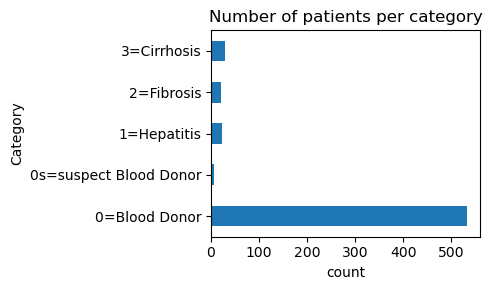

In [5]:
# import pandas as pd
# import numpy as np
# import matplotlib
from matplotlib import pylab as plt

plt.figure(figsize=(5,3))

df['Category'].value_counts().reindex(correct_order).plot.barh()
plt.xlabel('count')
plt.ylabel('Category')
plt.title('Number of patients per category')
plt.tight_layout()
plt.show()

### Column Pair Plots with Target Variable (Category)

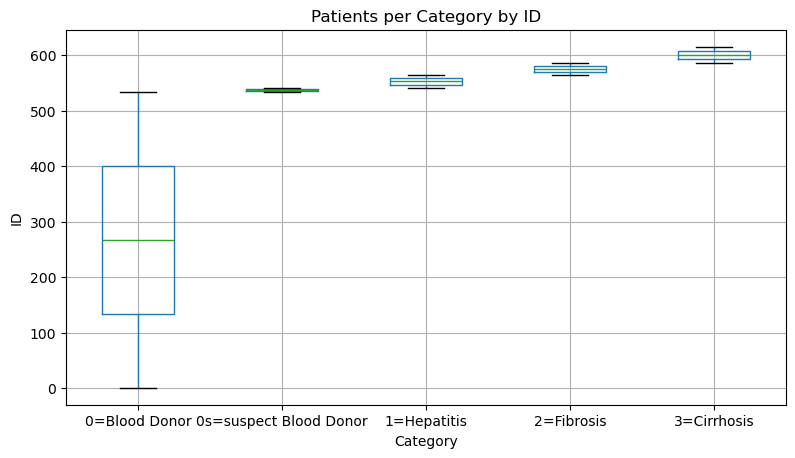

This box plot groups the ID by category.


In [6]:
df[['Category','Unnamed: 0']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by ID')
plt.xlabel('Category')
plt.ylabel('ID')
plt.show()
print('This box plot groups the ID by category.')

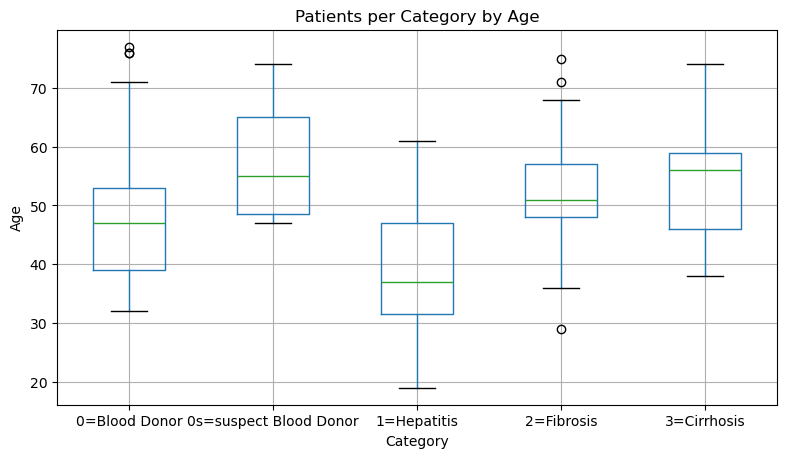

This box plot groups the age by category.


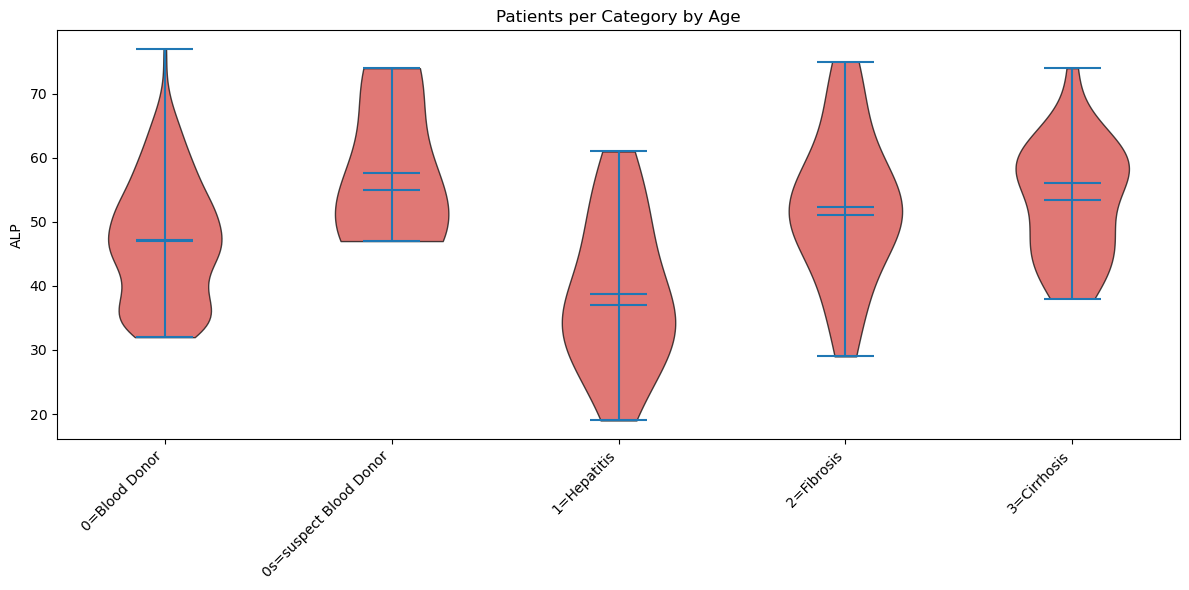

This violin plot groups the age by category.


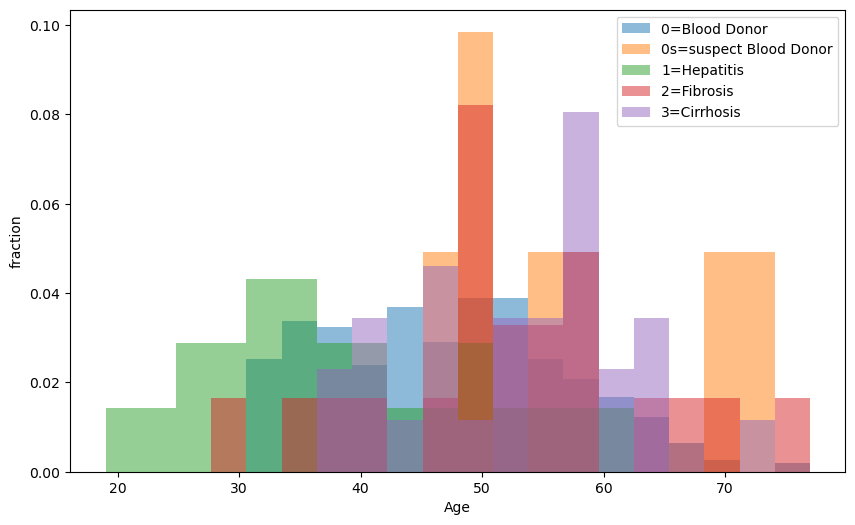

This category-specific histogram groups the age by category.


In [7]:
df[['Category','Age']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Age')
plt.xlabel('Category')
plt.ylabel('Age')
plt.show()
print('This box plot groups the age by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['Age'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['Age'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['Age'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['Age'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['Age'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('ALP')
plt.title('Patients per Category by Age')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the age by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['Age'].min(),df['Age'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['Age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Age')
plt.show()
print('This category-specific histogram groups the age by category.')

In [8]:
count_matrix = df.groupby(['Category', 'Sex']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Sex                       f    m
Category                        
0=Blood Donor           215  318
0s=suspect Blood Donor    1    6
1=Hepatitis               4   20
2=Fibrosis                8   13
3=Cirrhosis              10   20
Sex                            f         m
Category                                  
0=Blood Donor           0.403377  0.596623
0s=suspect Blood Donor  0.142857  0.857143
1=Hepatitis             0.166667  0.833333
2=Fibrosis              0.380952  0.619048
3=Cirrhosis             0.333333  0.666667


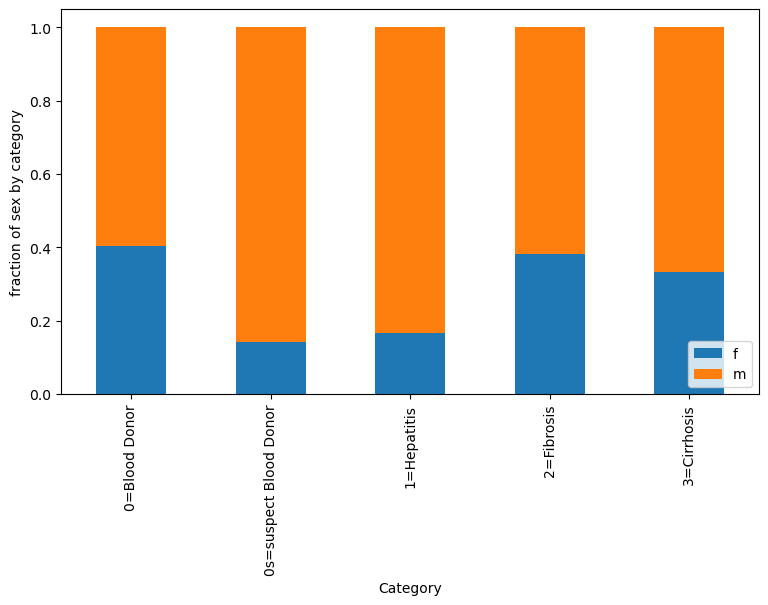

In [9]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(9,5))
plt.ylabel('fraction of sex by category')
plt.legend(loc=4)
plt.show()

In [10]:
count_matrix = df.groupby(['Sex', 'Category']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Category  0=Blood Donor  0s=suspect Blood Donor  1=Hepatitis  2=Fibrosis  \
Sex                                                                        
f                   215                       1            4           8   
m                   318                       6           20          13   

Category  3=Cirrhosis  
Sex                    
f                  10  
m                  20  
Category  0=Blood Donor  0s=suspect Blood Donor  1=Hepatitis  2=Fibrosis  \
Sex                                                                        
f              0.903361                0.004202     0.016807    0.033613   
m              0.843501                0.015915     0.053050    0.034483   

Category  3=Cirrhosis  
Sex                    
f            0.042017  
m            0.053050  


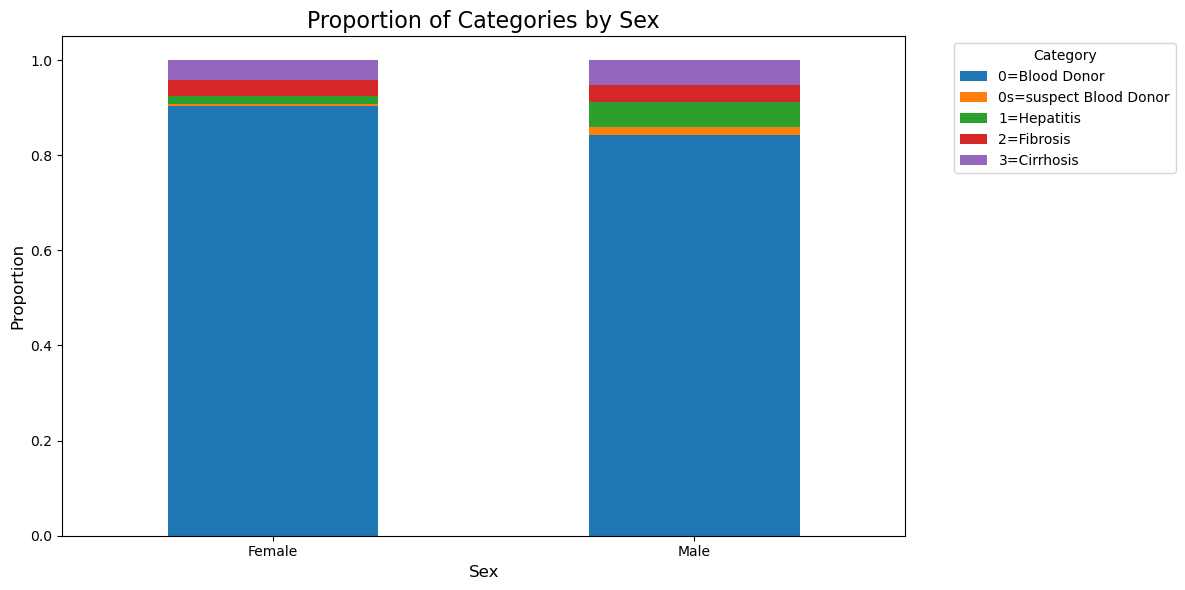

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Map 'm' and 'f' to 'male' and 'female'
df['Sex'] = df['Sex'].map({'m': 'Male', 'f': 'Female'})

# Create a cross-tabulation of Category by Sex, normalized by columns
count_matrix_norm = pd.crosstab(df['Sex'], df['Category'], normalize='index')

# Plot the stacked bar plot
ax = count_matrix_norm.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

plt.title('Proportion of Categories by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


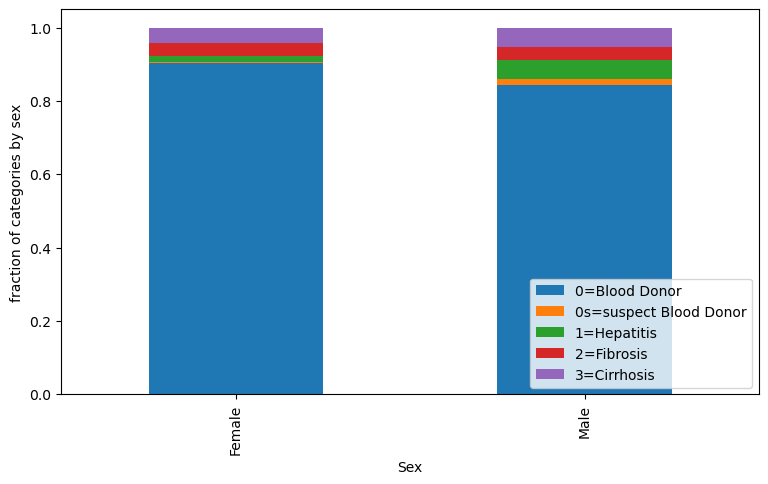

In [12]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(9,5))
plt.ylabel('fraction of categories by sex')
plt.legend(loc=4)
plt.show()

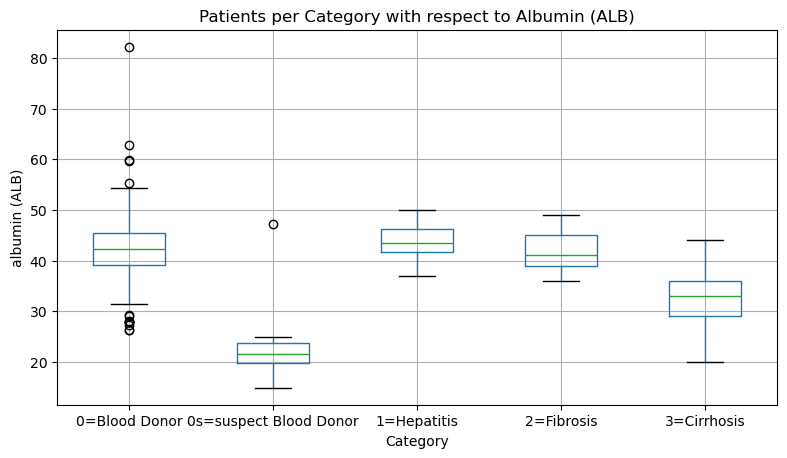

This box plot groups the albumin (ALB) by category.


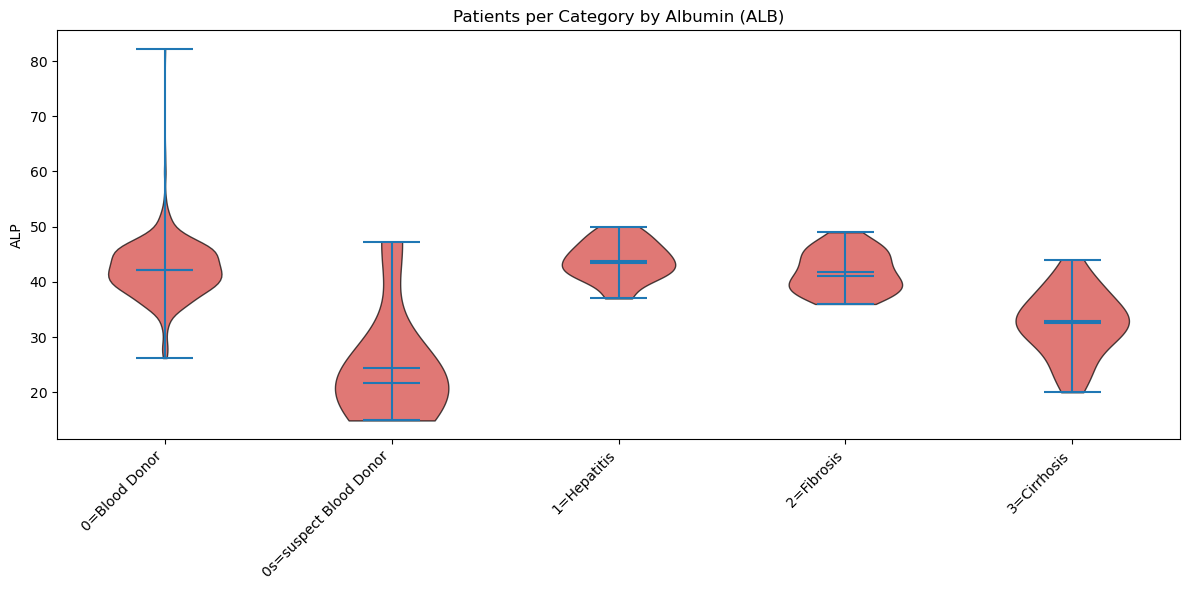

This violin plot groups the ALB by category.


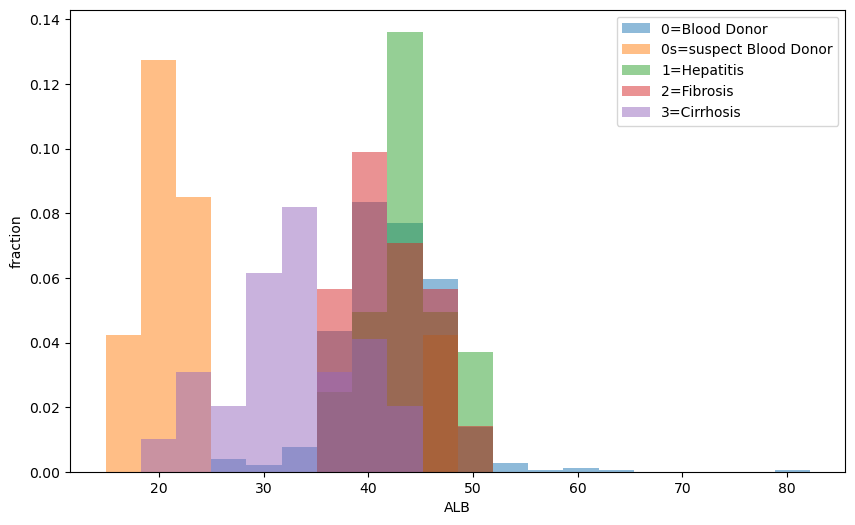

This category-specific histogram groups the ALB by category.


In [13]:
df[['Category','ALB']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category with respect to Albumin (ALB)')
plt.xlabel('Category')
plt.ylabel('albumin (ALB)')
plt.show()
print('This box plot groups the albumin (ALB) by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['ALB'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['ALB'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['ALB'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['ALB'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['ALB'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('ALP')
plt.title('Patients per Category by Albumin (ALB)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the ALB by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['ALB'].min(),df['ALB'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['ALB'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('ALB')
plt.show()
print('This category-specific histogram groups the ALB by category.')

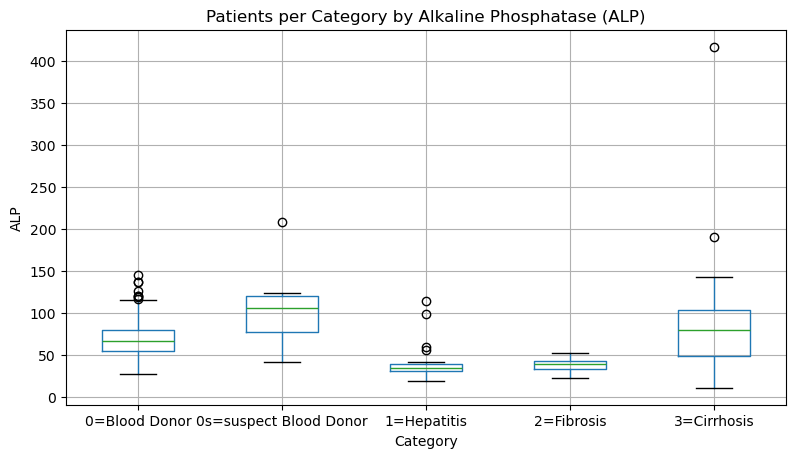

This box plot groups the ALP by category.


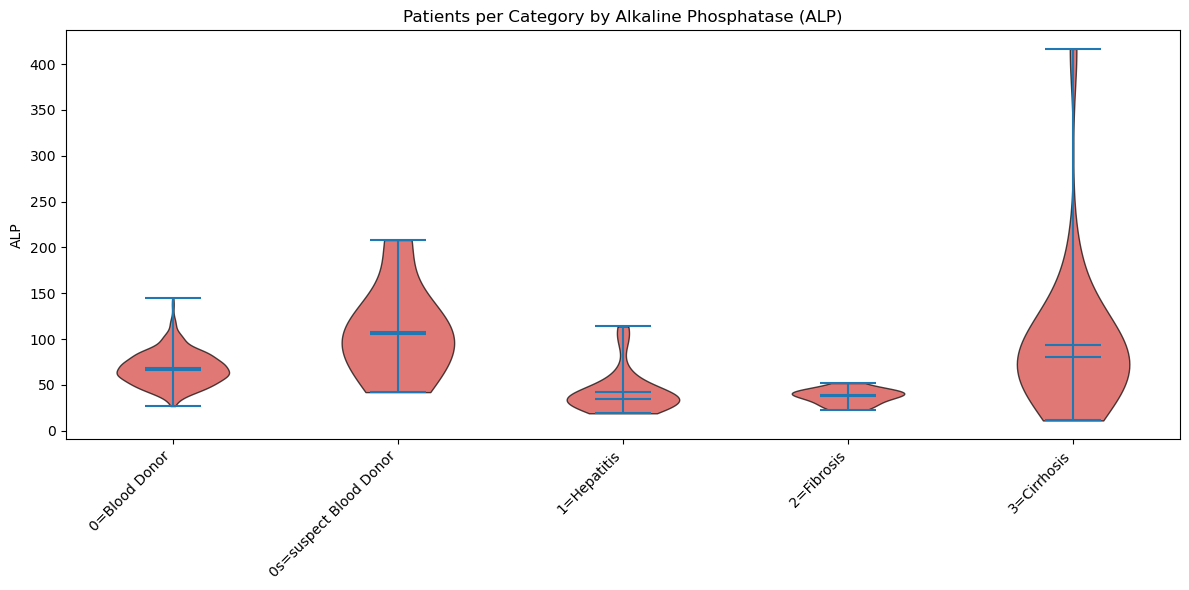

This violin plot groups the ALP by category.


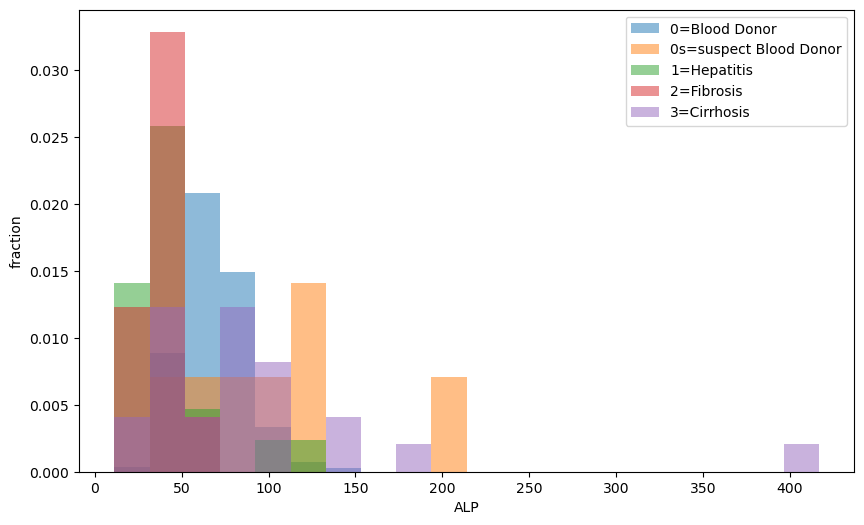

This category-specific histogram groups the ALP by category.


In [14]:
df[['Category','ALP']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Alkaline Phosphatase (ALP)')
plt.xlabel('Category')
plt.ylabel('ALP')
plt.show()
print('This box plot groups the ALP by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['ALP'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['ALP'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['ALP'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['ALP'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['ALP'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('ALP')
plt.title('Patients per Category by Alkaline Phosphatase (ALP)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the ALP by category.')


# dataset = [df[df['Category']=='0=Blood Donor']['ALP'].values,
#            df[df['Category']=='0s=suspect Blood Donor']['ALP'].values,
#            df[df['Category']=='1=Hepatitis']['ALP'].values,
#            df[df['Category']=='2=Fibrosis']['ALP'].values,
#            df[df['Category']=='3=Cirrhosis']['ALP'].values]

# plt.figure(figsize=(10,6))

# plt.violinplot(dataset = dataset, showmeans=True, showmedians=True)
# plt.xticks([1,2,3,4,5],['0=Blood Donor','0s=suspect Blood Donor','1=Hepatitis',' 2=Fibrosis',' 3=Cirrhosis'])
# plt.ylabel('ALP')
# plt.title('Patients per Category by Alkaline Phosphatase (ALP)')
# plt.show()
# print('This violin plot groups the ALP by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['ALP'].min(),df['ALP'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['ALP'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('ALP')
plt.show()
print('This category-specific histogram groups the ALP by category.')

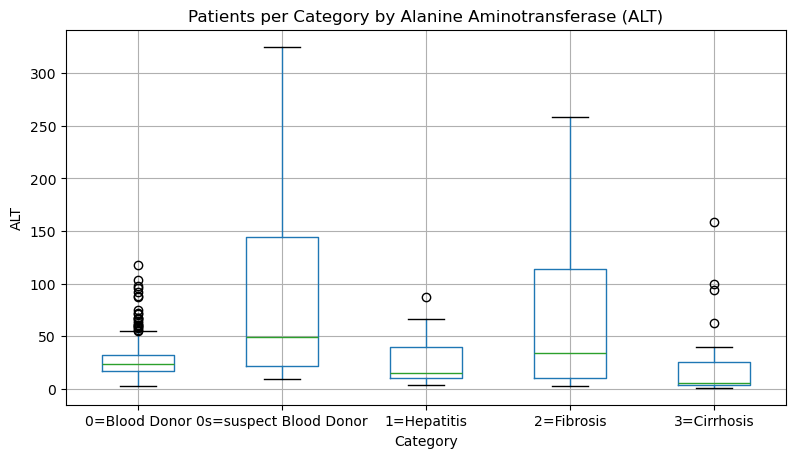

This box plot groups the ALT by category.


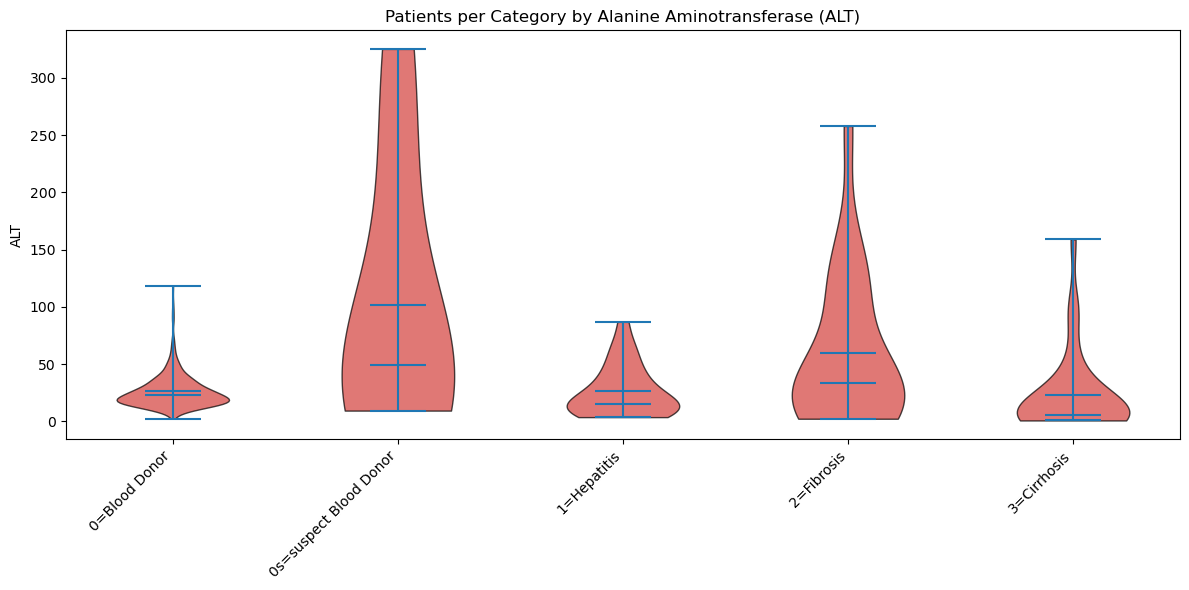

This violin plot groups the ALT by category.


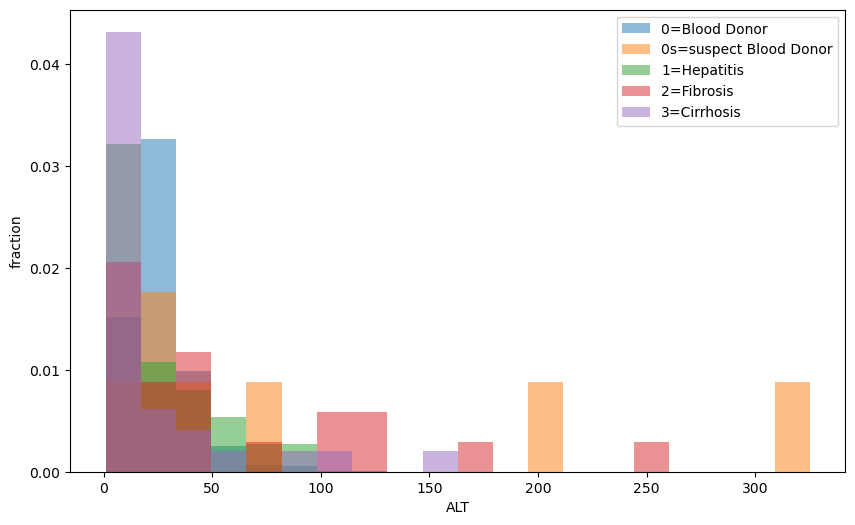

This category-specific histogram groups the ALT by category.


In [15]:
df[['Category','ALT']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Alanine Aminotransferase (ALT)')
plt.xlabel('Category')
plt.ylabel('ALT')
plt.show()
print('This box plot groups the ALT by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['ALT'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['ALT'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['ALT'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['ALT'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['ALT'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('ALT')
plt.title('Patients per Category by Alanine Aminotransferase (ALT)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the ALT by category.')


# dataset = [df[df['Category']=='0=Blood Donor']['ALT'].values,
#            df[df['Category']=='0s=suspect Blood Donor']['ALT'].values,
#            df[df['Category']=='1=Hepatitis']['ALT'].values,
#            df[df['Category']=='2=Fibrosis']['ALT'].values,
#            df[df['Category']=='3=Cirrhosis']['ALT'].values]

# plt.figure(figsize=(10,6))

# plt.violinplot(dataset = dataset, showmeans=True, showmedians=True)
# plt.xticks([1,2,3,4,5],['0=Blood Donor','0s=suspect Blood Donor','1=Hepatitis',' 2=Fibrosis',' 3=Cirrhosis'])
# plt.ylabel('ALT')
# plt.title('Patients per Category by Alanine Aminotransferase (ALT)')
# plt.show()
# print('This violin plot groups the ALT by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['ALT'].min(),df['ALT'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['ALT'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('ALT')
plt.show()
print('This category-specific histogram groups the ALT by category.')

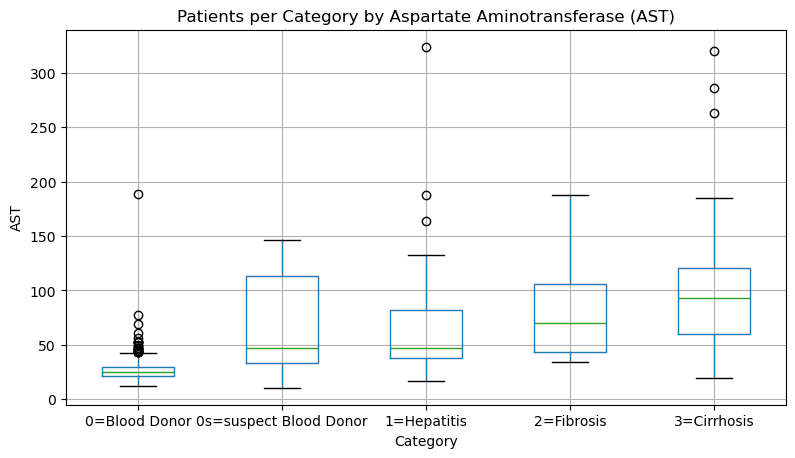

This box plot groups the AST by category.


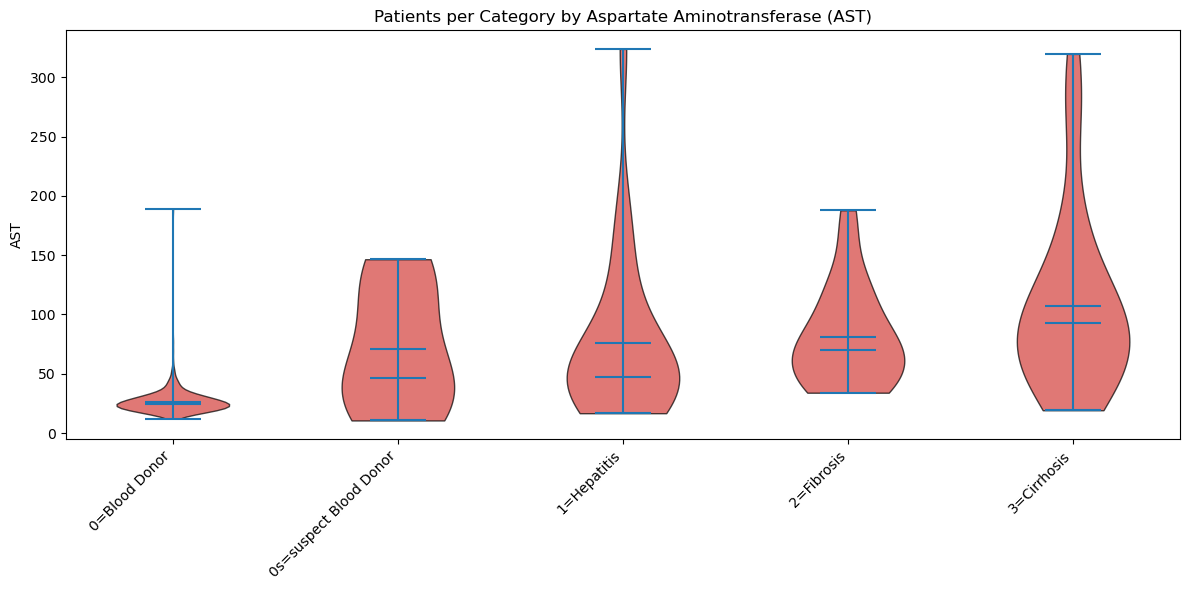

This violin plot groups the AST by category.


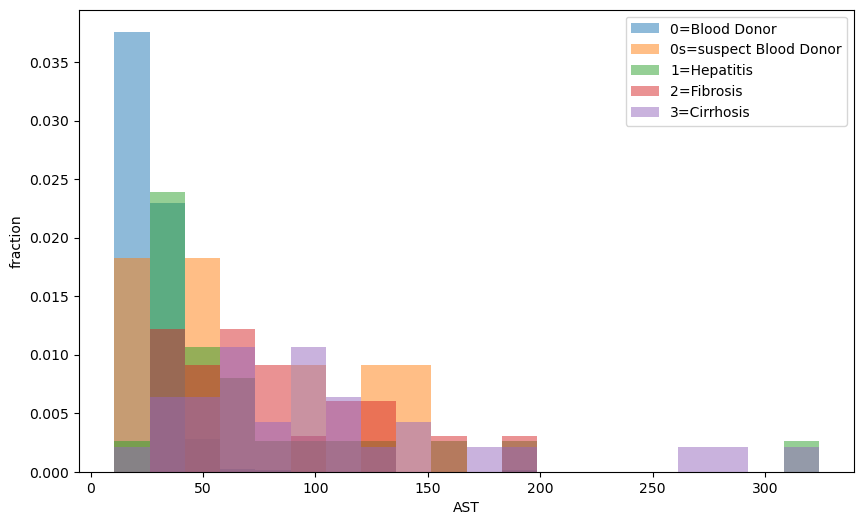

This category-specific histogram groups the AST by category.


In [16]:
df[['Category','AST']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Aspartate Aminotransferase (AST)')
plt.xlabel('Category')
plt.ylabel('AST')
plt.show()
print('This box plot groups the AST by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['AST'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['AST'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['AST'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['AST'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['AST'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('AST')
plt.title('Patients per Category by Aspartate Aminotransferase (AST)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the AST by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['AST'].min(),df['AST'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['AST'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('AST')
plt.show()
print('This category-specific histogram groups the AST by category.')

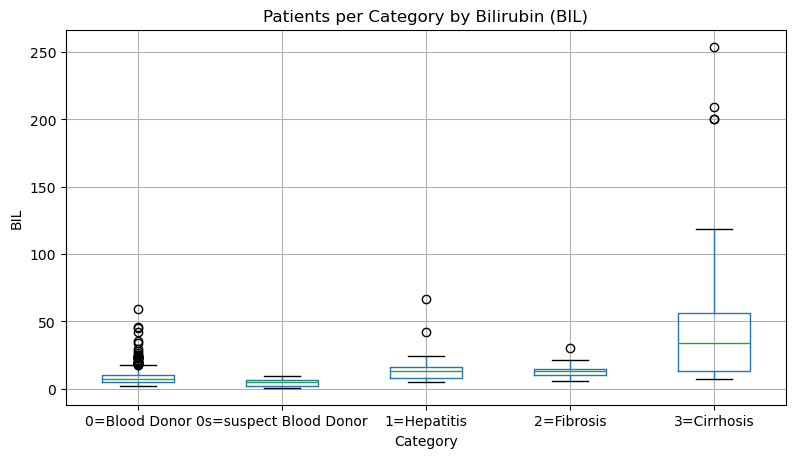

This box plot groups the BIL by category.


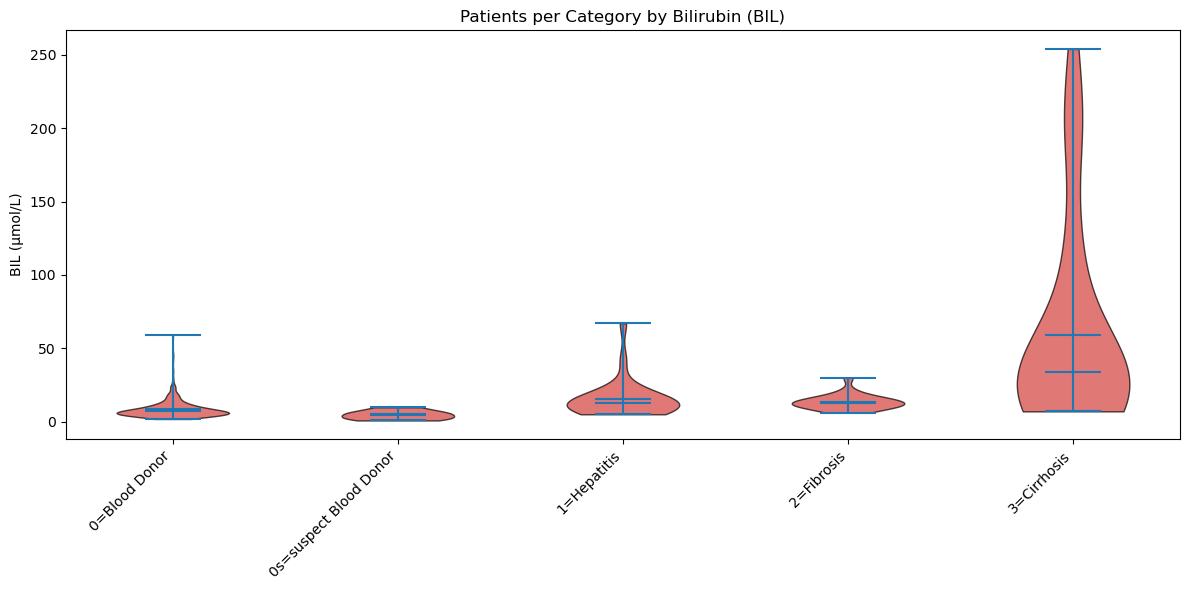

This violin plot groups the BIL by category.


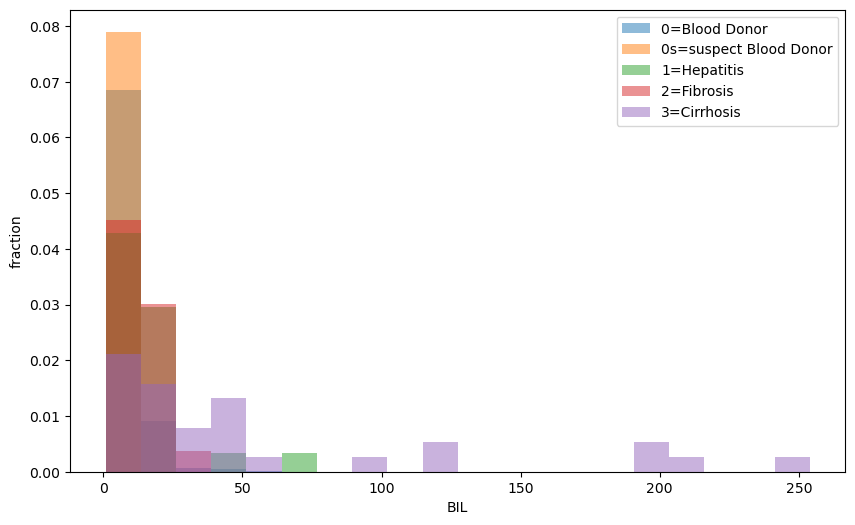

This category-specific histogram groups the BIL by category.


In [17]:
df[['Category','BIL']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Bilirubin (BIL)')
plt.xlabel('Category')
plt.ylabel('BIL')
plt.show()
print('This box plot groups the BIL by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['BIL'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['BIL'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['BIL'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['BIL'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['BIL'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('BIL (μmol/L)')
plt.title('Patients per Category by Bilirubin (BIL)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the BIL by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['BIL'].min(),df['BIL'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['BIL'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('BIL')
plt.show()
print('This category-specific histogram groups the BIL by category.')

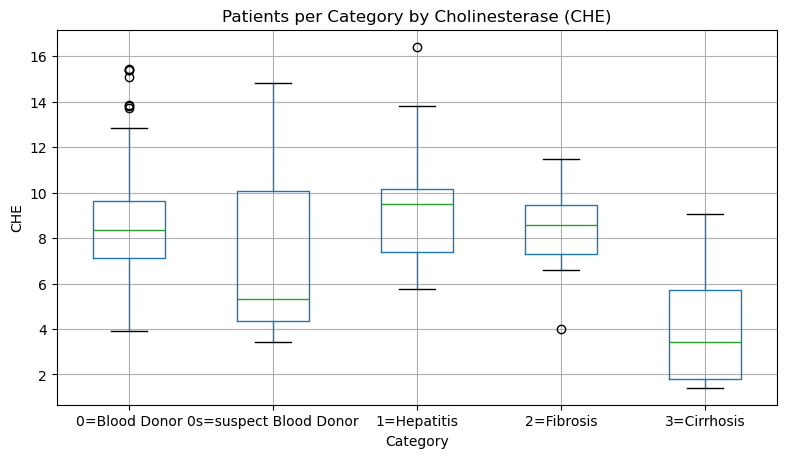

This box plot groups the CHE by category.


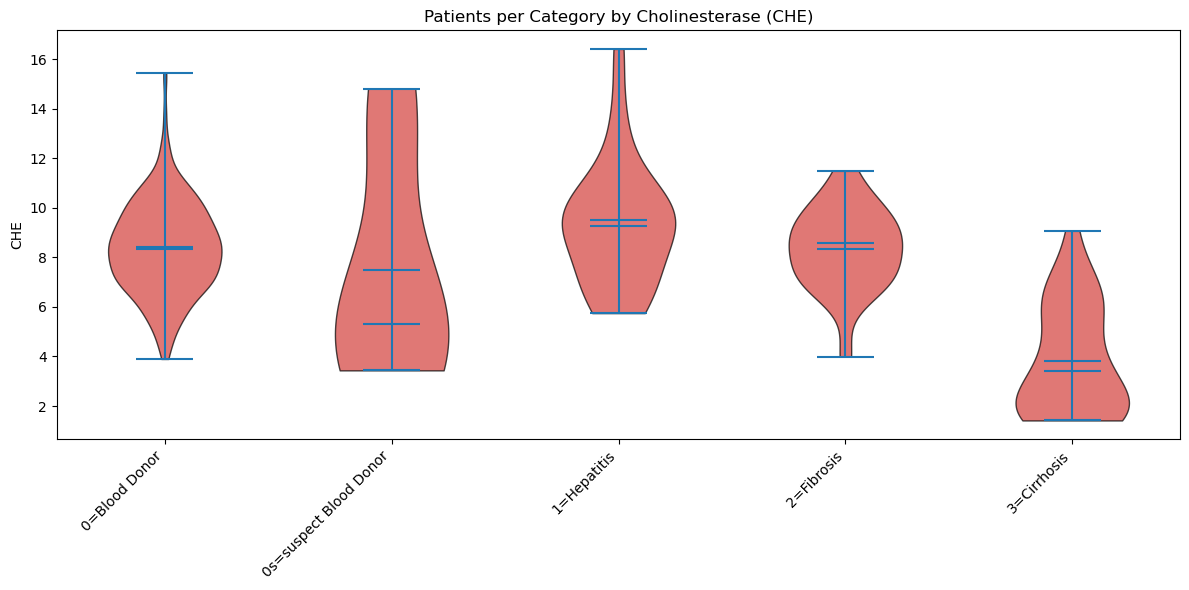

This violin plot groups the CHE by category.


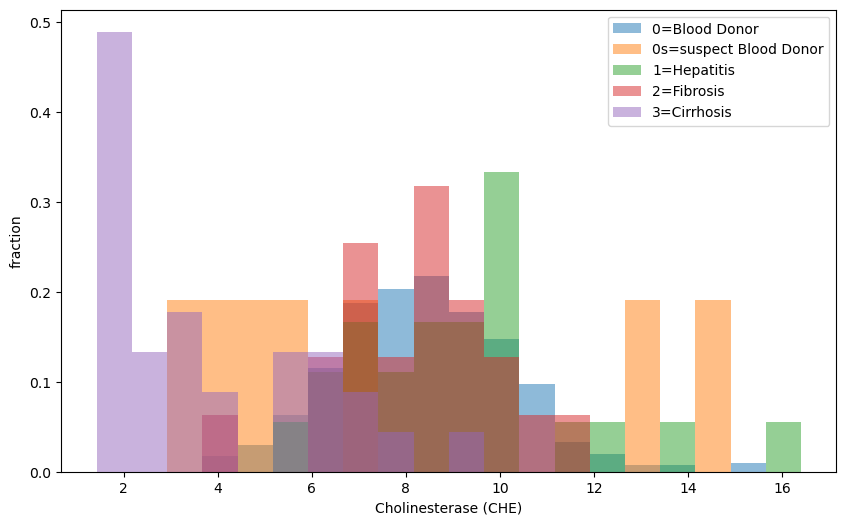

This stacked bar chart groups the CHE by category.


In [18]:
df[['Category','CHE']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Cholinesterase (CHE)')
plt.xlabel('Category')
plt.ylabel('CHE')
plt.show()
print('This box plot groups the CHE by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['CHE'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['CHE'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['CHE'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['CHE'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['CHE'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('CHE')
plt.title('Patients per Category by Cholinesterase (CHE)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the CHE by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['CHE'].min(),df['CHE'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['CHE'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Cholinesterase (CHE)')
plt.show()
print('This stacked bar chart groups the CHE by category.')

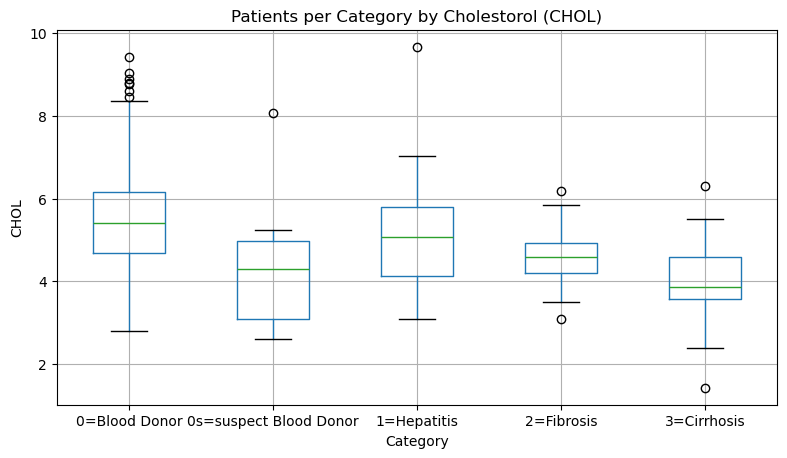

This box plot groups the CHOL by category.


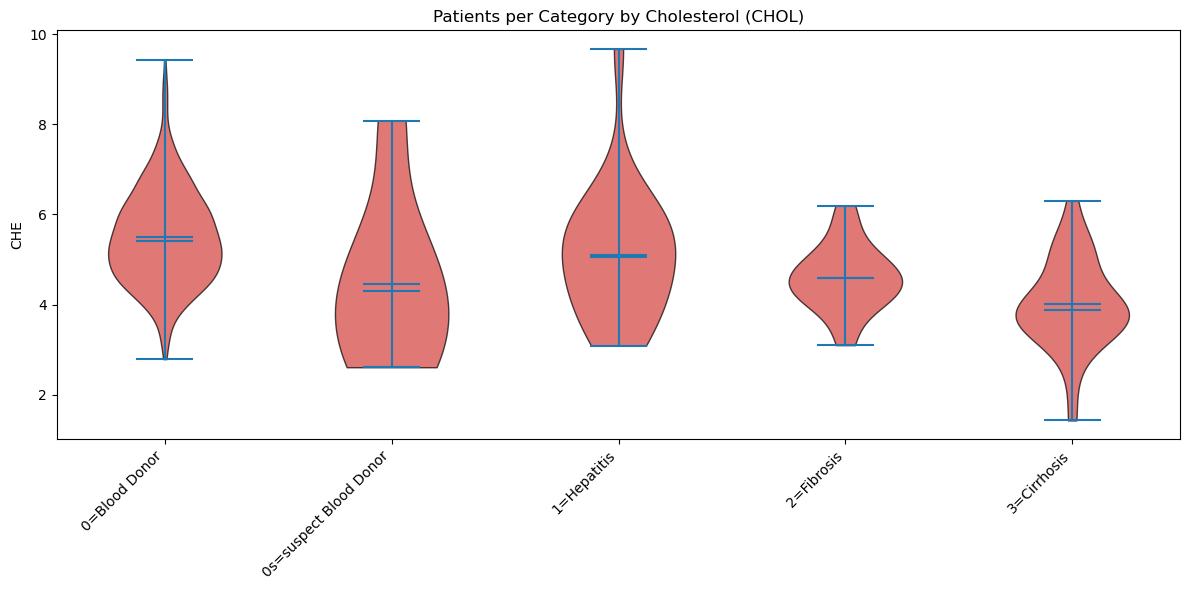

This violin plot groups the CHOL by category.


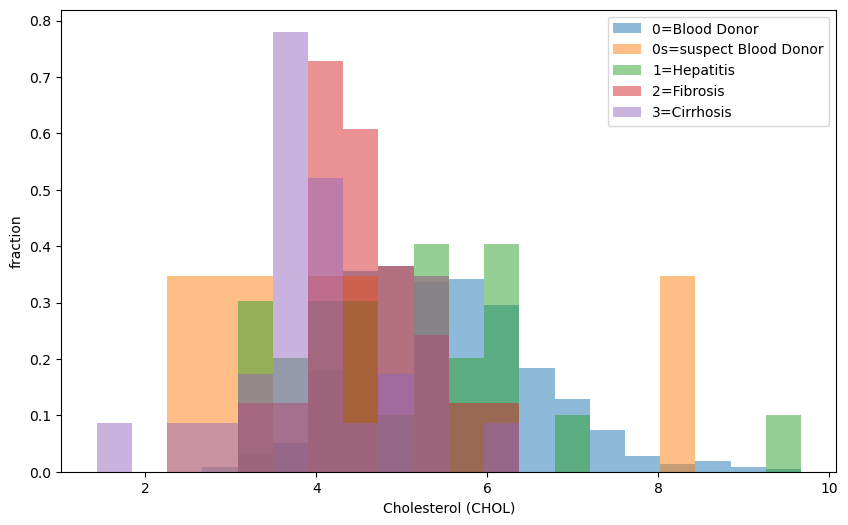

This stacked bar chart groups the CHOL by category.


In [19]:
df[['Category','CHOL']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Cholestorol (CHOL)')
plt.xlabel('Category')
plt.ylabel('CHOL')
plt.show()
print('This box plot groups the CHOL by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['CHOL'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['CHOL'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['CHOL'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['CHOL'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['CHOL'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('CHE')
plt.title('Patients per Category by Cholesterol (CHOL)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the CHOL by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['CHOL'].min(),df['CHOL'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['CHOL'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Cholesterol (CHOL)')
plt.show()
print('This stacked bar chart groups the CHOL by category.')

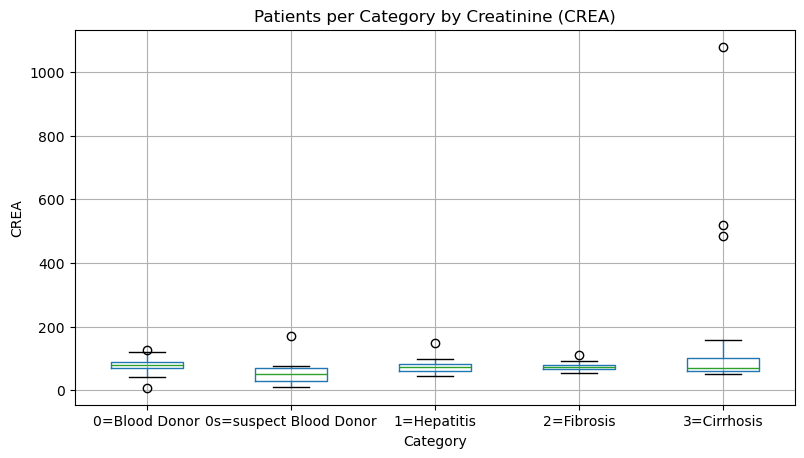

This box plot groups the CREA by category.


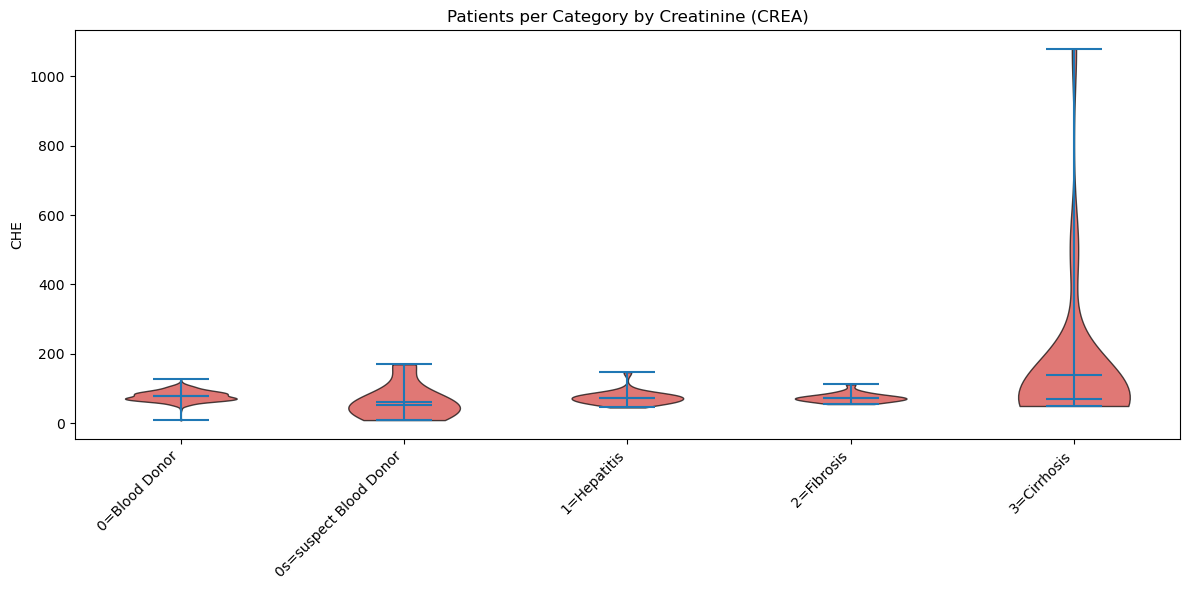

This violin plot groups the CREA by category.


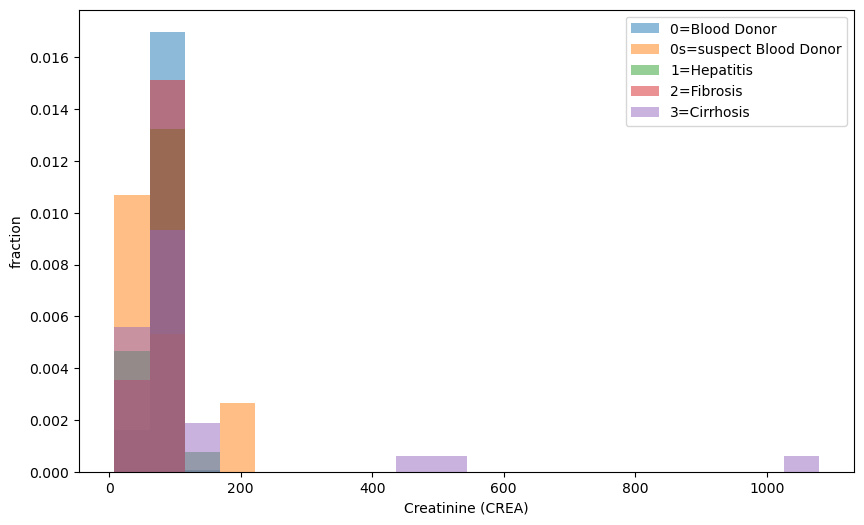

This stacked bar chart groups the CREA by category.


In [20]:
df[['Category','CREA']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Creatinine (CREA)')
plt.xlabel('Category')
plt.ylabel('CREA')
plt.show()
print('This box plot groups the CREA by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['CREA'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['CREA'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['CREA'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['CREA'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['CREA'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('CHE')
plt.title('Patients per Category by Creatinine (CREA)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the CREA by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['CREA'].min(),df['CREA'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['CREA'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Creatinine (CREA)')
plt.show()
print('This stacked bar chart groups the CREA by category.')

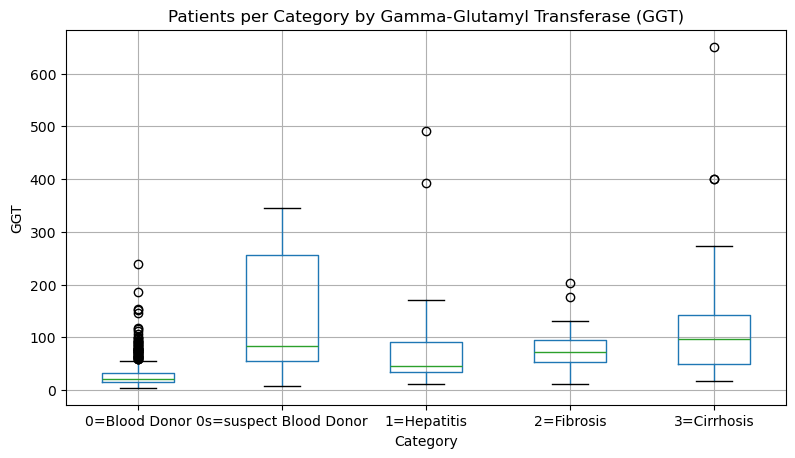

This box plot groups the GGT by category.


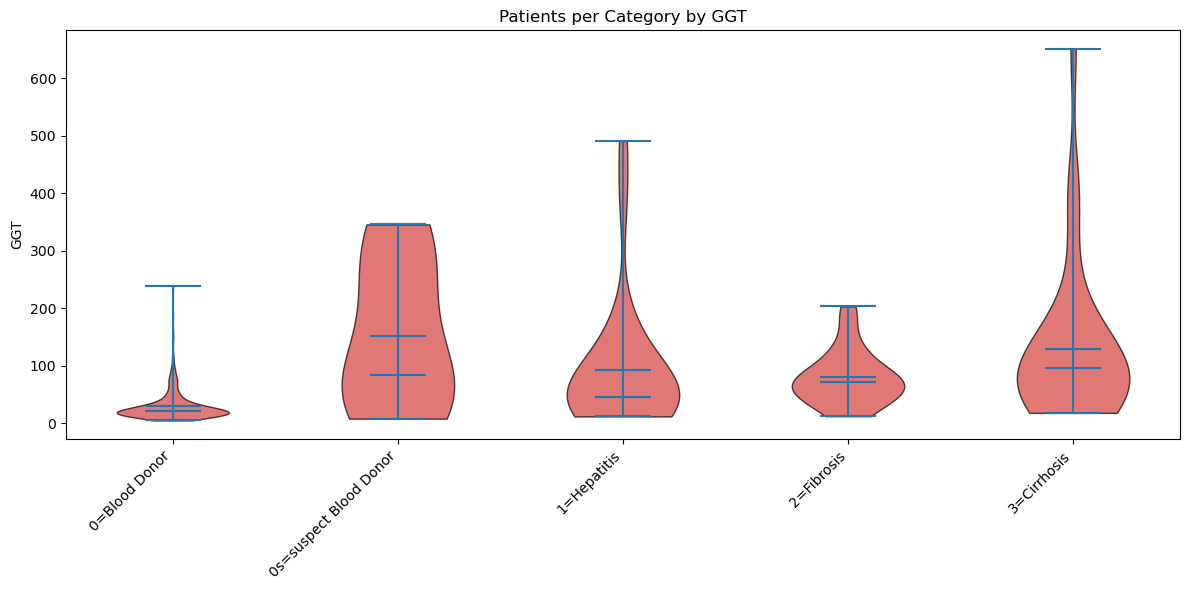

This violin plot groups the GGT by category.


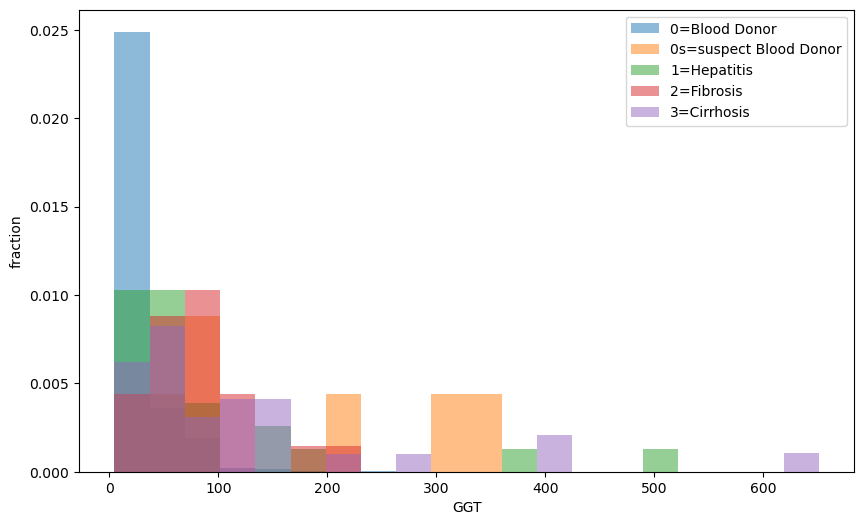

This stacked bar chart groups the GGT by category.


In [21]:
df[['Category','GGT']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Gamma-Glutamyl Transferase (GGT)')
plt.xlabel('Category')
plt.ylabel('GGT')
plt.show()
print('This box plot groups the GGT by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['GGT'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['GGT'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['GGT'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['GGT'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['GGT'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('GGT')
plt.title('Patients per Category by GGT')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the GGT by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['GGT'].min(),df['GGT'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['GGT'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('GGT')
plt.show()
print('This stacked bar chart groups the GGT by category.')

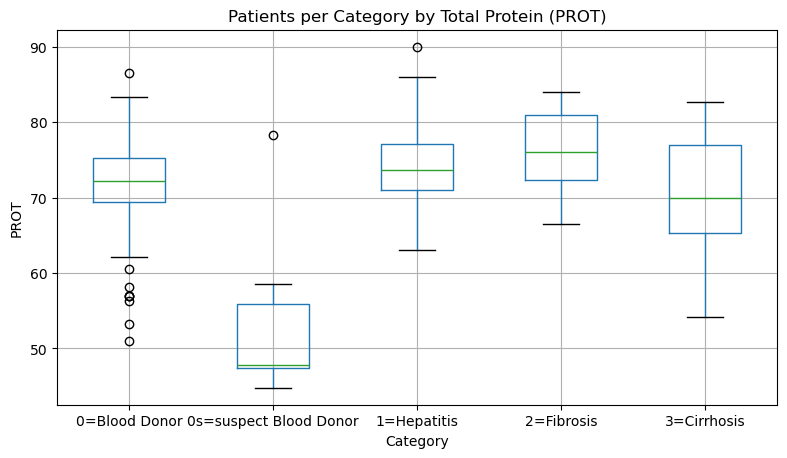

This box plot groups the PROT by category.


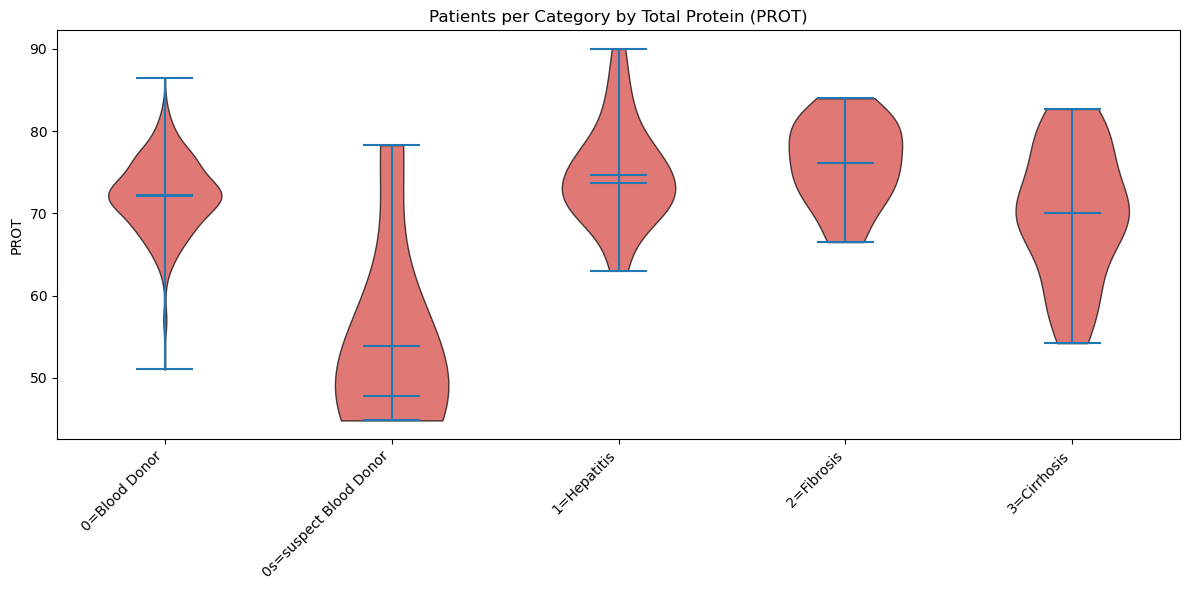

This violin plot groups the PROT by category.


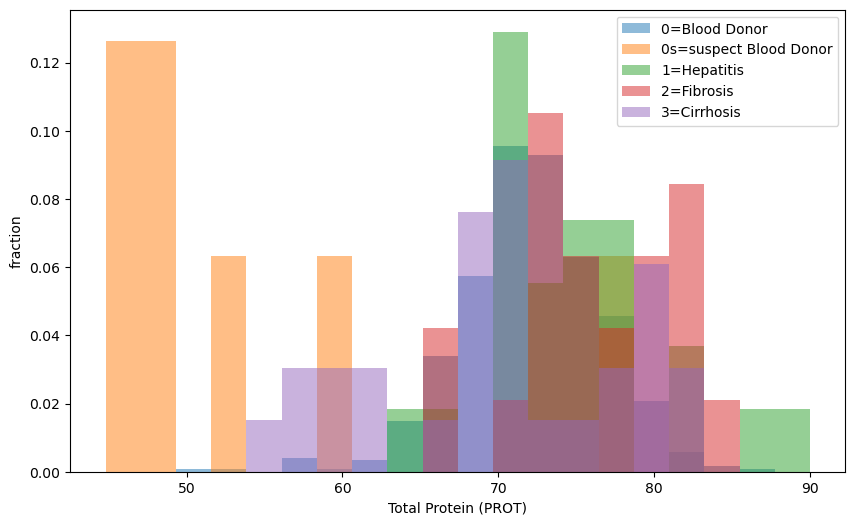

This stacked bar chart groups the PROT by category.


In [22]:
df[['Category','PROT']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Total Protein (PROT)')
plt.xlabel('Category')
plt.ylabel('PROT')
plt.show()
print('This box plot groups the PROT by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['PROT'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['PROT'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['PROT'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['PROT'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['PROT'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('PROT')
plt.title('Patients per Category by Total Protein (PROT)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the PROT by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['PROT'].min(),df['PROT'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['PROT'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Total Protein (PROT)')
plt.show()
print('This stacked bar chart groups the PROT by category.')

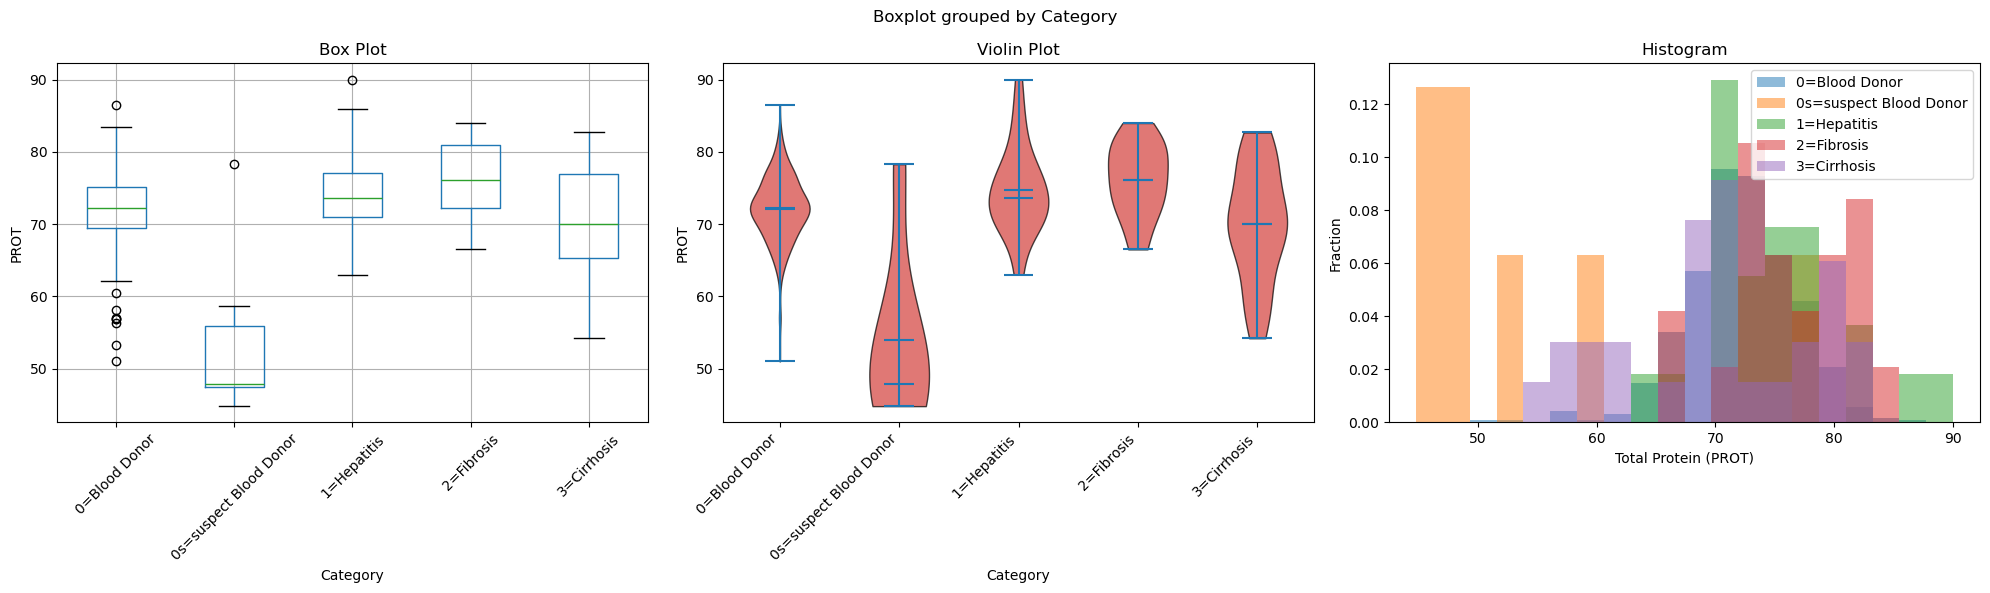

These plots group the PROT by category.


In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Patients per Category by Total Protein (PROT)', fontsize=16)

# Box Plot
df.boxplot(column='PROT', by='Category', ax=ax1)
ax1.set_title('Box Plot')
ax1.set_xlabel('Category')
ax1.set_ylabel('PROT')
ax1.tick_params(axis='x', rotation=45)

# Violin Plot
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
dataset = [df[df['Category'] == cat]['PROT'].dropna().values for cat in categories]
dataset = [d for d in dataset if len(d) > 0]

vp = ax2.violinplot(dataset=dataset, showmeans=True, showmedians=True)
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

ax2.set_xticks(range(1, len(dataset) + 1))
ax2.set_xticklabels(categories, rotation=45, ha='right')
ax2.set_title('Violin Plot')
ax2.set_xlabel('Category')
ax2.set_ylabel('PROT')

# Histogram
bin_range = (df['PROT'].min(), df['PROT'].max())
for c in categories:
    ax3.hist(df[df['Category']==c]['PROT'], alpha=0.5, label=c, range=bin_range, bins=20, density=True)
ax3.legend()
ax3.set_title('Histogram')
ax3.set_xlabel('Total Protein (PROT)')
ax3.set_ylabel('Fraction')

# Adjust layout and display
plt.tight_layout()
plt.show()

print('These plots group the PROT by category.')


### Column Pair Plots Between Features

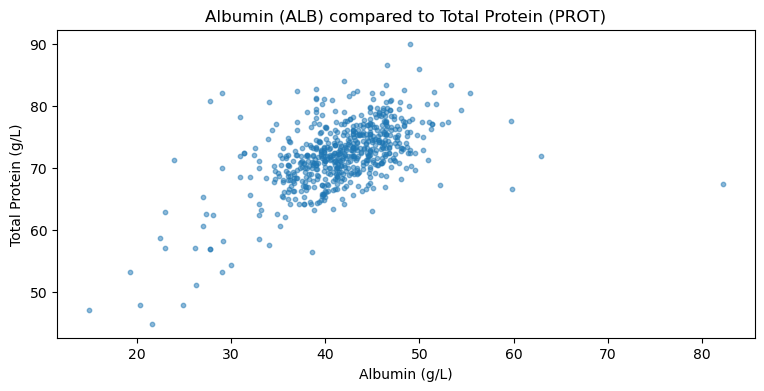

This scatter plot shows the relationship between albumin and total protein. Albumin and total protein in blood are positively correlated.


In [24]:
df.plot.scatter('ALB','PROT',figsize=(9,4),alpha=0.5,s=10) 

plt.title('Albumin (ALB) compared to Total Protein (PROT)')
plt.xlabel('Albumin (g/L)')
plt.ylabel('Total Protein (g/L)')
plt.show()
print('This scatter plot shows the relationship between albumin and total protein. Albumin and total protein in blood are positively correlated.')

In [25]:
df_cleaned = df.dropna()

nbins = 40

heatmap, xedges, yedges = np.histogram2d(df_cleaned['ALB'], df_cleaned['PROT'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

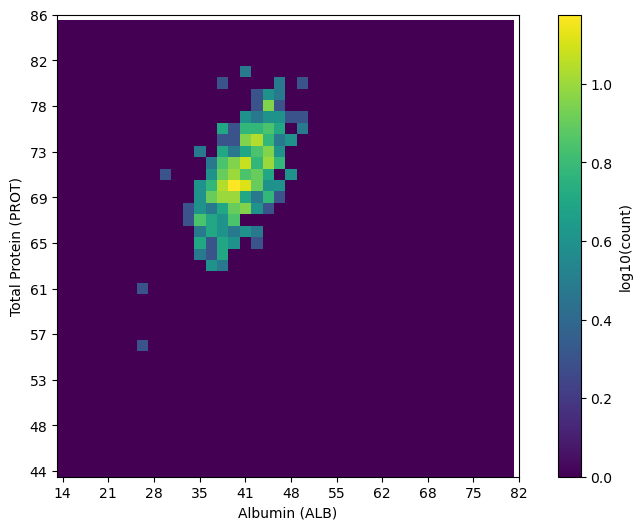

In [26]:
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(10,6))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
#plt.imshow(heatmap.T, origin='lower',vmin=0) # use log count
plt.xlabel('Albumin (ALB)')
plt.ylabel('Total Protein (PROT)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)',cmap='coolwarm')
plt.show()

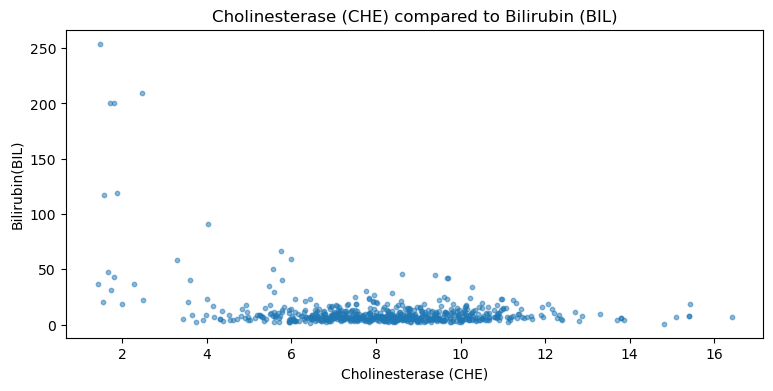

This scatter plot shows the relationship between cholinesterase and bilirubin. Cholinesterase and bilirubin in blood are weakly negatively correlated.


In [27]:
df.plot.scatter('CHE','BIL',figsize=(9,4),alpha=0.5,s=10) 

plt.title('Cholinesterase (CHE) compared to Bilirubin (BIL)')
plt.xlabel('Cholinesterase (CHE)')
plt.ylabel('Bilirubin(BIL)')
plt.show()
print('This scatter plot shows the relationship between cholinesterase and bilirubin. Cholinesterase and bilirubin in blood are weakly negatively correlated.')

In [28]:
df_cleaned = df.dropna()

nbins = 40

heatmap, xedges, yedges = np.histogram2d(df_cleaned['CHE'], df_cleaned['BIL'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

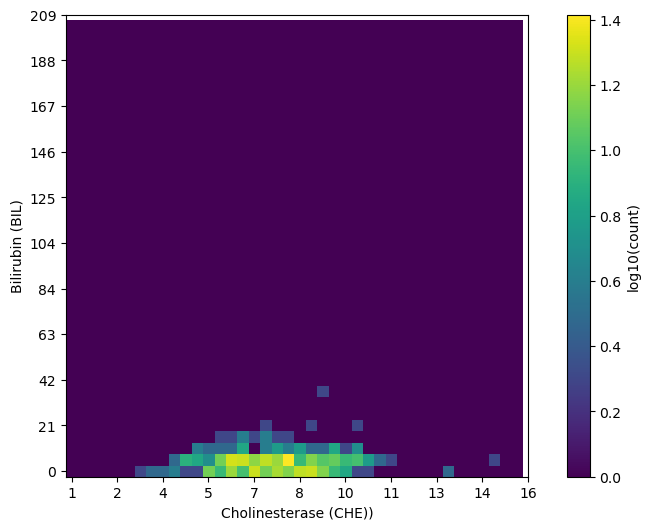

In [29]:
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(10,6))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
#plt.imshow(heatmap.T, origin='lower',vmin=0) # use log count
plt.xlabel('Cholinesterase (CHE))')
plt.ylabel('Bilirubin (BIL)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)',cmap='coolwarm')
plt.show()

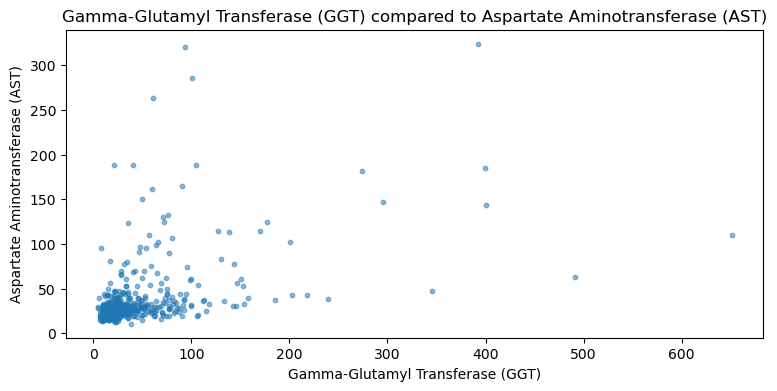

This scatter plot shows the relationship between Gamma-Glutamyl Transferase and Aspartate Aminotransferase. Gamma-Glutamyl Transferase and Aspartate Aminotransferase in blood are positively correlated.


In [30]:
df.plot.scatter('GGT','AST',figsize=(9,4),alpha=0.5,s=10) 

plt.title('Gamma-Glutamyl Transferase (GGT) compared to Aspartate Aminotransferase (AST)')
plt.xlabel('Gamma-Glutamyl Transferase (GGT)')
plt.ylabel('Aspartate Aminotransferase (AST)')
plt.show()
print('This scatter plot shows the relationship between Gamma-Glutamyl Transferase and Aspartate Aminotransferase. Gamma-Glutamyl Transferase and Aspartate Aminotransferase in blood are positively correlated.')

### Correlation Matrix

In [31]:
df_numeric = df.drop(columns=['Category', 'Unnamed: 0'])
df_numeric.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,Male,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,Male,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,Male,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,Male,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,Male,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [32]:
import pandas as pd

# Converting 'Sex' to numeric values
df_numeric['Sex'] = df_numeric['Sex'].map({'m': 1, 'f': 2})


In [33]:
corr_matrix = df_numeric.corr(method='pearson', min_periods=1, numeric_only=False)
corr_matrix

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,NaN,-0.197498,0.173340,-0.006021,0.088666,0.032492,-0.075093,0.125641,-0.022296,0.153087,-0.153668
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,-0.197498,NaN,1.000000,-0.141584,0.001606,-0.193450,-0.221651,0.375878,0.208248,-0.001573,-0.155749,0.557197
ALP,0.173340,NaN,-0.141584,1.000000,0.214480,0.063948,0.056078,0.033753,0.125429,0.149832,0.454630,-0.055109
ALT,-0.006021,NaN,0.001606,0.214480,1.000000,0.273326,-0.038469,0.147000,0.068947,-0.043025,0.248114,0.094730
AST,0.088666,NaN,-0.193450,0.063948,0.273326,1.000000,0.312231,-0.208536,-0.209970,-0.021387,0.491263,0.040071
BIL,0.032492,NaN,-0.221651,0.056078,-0.038469,0.312231,1.000000,-0.333172,-0.180370,0.031224,0.217024,-0.047638
CHE,-0.075093,NaN,0.375878,0.033753,0.147000,-0.208536,-0.333172,1.000000,0.425456,-0.011157,-0.110345,0.295427
CHOL,0.125641,NaN,0.208248,0.125429,0.068947,-0.209970,-0.180370,0.425456,1.000000,-0.047744,-0.006895,0.207071
CREA,-0.022296,NaN,-0.001573,0.149832,-0.043025,-0.021387,0.031224,-0.011157,-0.047744,1.000000,0.121003,-0.031704


/var/folders/5f/vr6wj5x522d5sydssspp10r80000gn/T/ipykernel_10250/2612980567.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1600x1400 with 0 Axes>

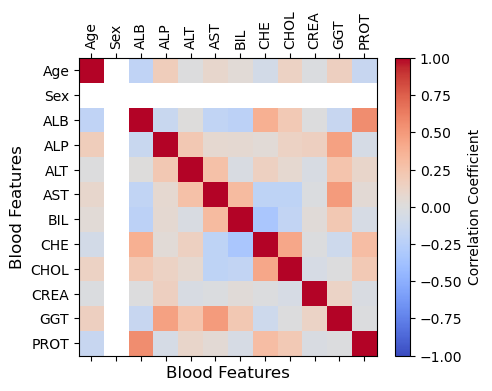

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(16, 14))

# Create the heatmap
plt.matshow(corr_matrix, fignum=None, vmin=-1, vmax=1, cmap='coolwarm')

# Adjust font size for readability
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, rotation=90, fontsize=10)
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=10)

plt.xlabel('Blood Features', fontsize=12)
plt.ylabel('Blood Features', fontsize=12)
plt.colorbar(label='Correlation Coefficient', shrink=0.8)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()


## Step 2: Splitting the Data

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = df.drop(columns=['Category','Unnamed: 0'])
y = df['Category']


def StratifiedSplit(X, y, random_state, test_size, n_splits):
    # stratified train-test split
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

    # do StratifiedKFold split on other
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_index, val_index in kf.split(X_other, y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        
        print("Train set:")
        print(X_train)
        print(y_train)
        print("\nValidation set:")
        print(X_val)
        print(y_val)
        print("\nTest set:")
        print(X_test)
        print(y_test)
        print("--------------------")
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Call the function
X_train, y_train, X_val, y_val, X_test, y_test = StratifiedSplit(X, y, random_state=42, test_size=0.2, n_splits=4)

Train set:
     Age     Sex   ALB   ALP   ALT    AST    BIL   CHE  CHOL  CREA    GGT  \
441   49  Female  39.3  59.4  18.3   15.0    4.8  8.03  4.58  83.0   12.5   
216   52    Male  82.2  82.2  37.0   23.7    7.8  8.90  6.09  77.0   87.8   
605   42  Female  33.0  79.0   3.7   55.7  200.0  1.72  5.16  89.1  146.3   
341   34  Female  39.7  39.3  11.2   16.4    8.4  5.27  4.68  61.0   24.3   
595   56    Male  27.0  81.1  17.0  319.8   37.0  1.42  3.54  66.9   93.7   
..   ...     ...   ...   ...   ...    ...    ...   ...   ...   ...    ...   
432   48  Female  43.7  50.1  17.3   26.3    8.1  8.15  5.38  64.0   13.4   
27    34    Male  29.0  41.6  29.1   16.1    4.8  6.82  4.03  62.0   14.5   
561   41  Female  37.0  31.2   8.2   38.3    7.0  7.08  5.30  60.8   24.7   
63    37    Male  50.4  48.5  19.4   27.5   11.6  5.78  4.93  90.0   27.8   
347   35  Female  42.0  69.0  19.9   16.6   10.8  7.85  4.43  67.0   15.1   

     PROT  
441  74.3  
216  67.4  
605  69.9  
341  71.5  
595 

## Step 3: Preprocessing the Data

### Fit and Transform the Data

In [36]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Separate features and target
X = df.drop('Category', axis=1)
y = df['Category']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Sex']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Fit and transform the features
X_encoded = preprocessor.fit_transform(X)

# Create feature names for the encoded dataset
onehot_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = onehot_encoder.get_feature_names_out(['Sex'])
feature_names = list(numeric_features) + list(cat_feature_names)

# Convert to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)

In [38]:
# collect which encoder to use on each feature
# needs to be done manually
ordinal_ftrs = [] 
ordinal_cats = []
onehot_ftrs = ['Sex']
minmax_ftrs = ['Age']
std_ftrs = ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)
print(X_val_prep)
print(X_test_prep)

(369, 12)
(369, 13)
[[ 0.          1.          0.17241379 ... -0.06599065 -0.05450203
   3.2602577 ]
 [ 1.          0.          0.24137931 ... -0.25717529 -0.37425025
  -0.07508084]
 [ 0.          1.          0.56896552 ... -0.09785476  0.87368137
  -0.79235794]
 ...
 [ 0.          1.          0.25862069 ... -0.33683556 -0.46560688
  -3.33869166]
 [ 1.          0.          0.37931034 ... -0.35595402 -0.27923935
   1.8974312 ]
 [ 0.          1.          0.31034483 ...  0.10926194 -0.22259824
   0.57046856]]
[[ 1.          0.          0.51724138 ... -0.00226244 -0.50214954
   0.44494507]
 [ 1.          0.          0.25862069 ... -0.35276761 -0.28654788
  -0.05714891]
 [ 0.          1.          0.62068966 ... -0.0500586  -0.17874705
   0.06837459]
 ...
 [ 0.          1.          0.27586207 ... -0.27310734 -0.21711684
   0.39114928]
 [ 0.          1.          0.62068966 ...  0.17299015  0.0532988
  -0.30819589]
 [ 1.          0.          0.27586207 ... -0.25717529 -0.45464409
  -1.38411155

In [39]:
feature_names = (preprocessor.named_transformers_['onehot']
                 .get_feature_names_out(['Sex'])
                 .tolist())
feature_names += minmax_ftrs + std_ftrs


In [40]:
import pandas as pd

X_test_prep_df = pd.DataFrame(X_test_prep, columns=feature_names)


### Missing Values

Occurrences of 'NA':
Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64
Occurrences of '?':
Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64
Missing values per column:
Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


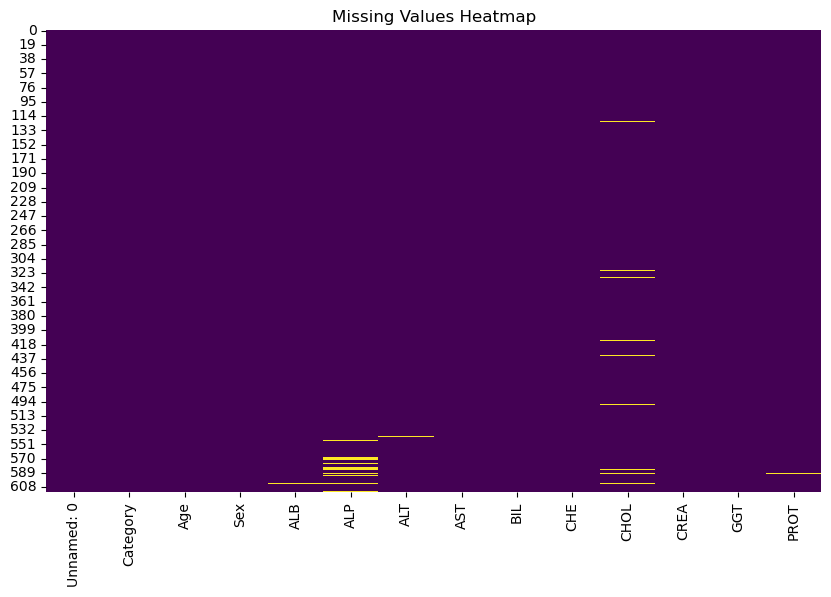

In [41]:
import pandas as pd
import numpy as np

#read in txt file using pandas read_csv function with a tab delimiter
df = pd.read_csv('hcvdat0.csv')

#display the first few rows of the table
df.head()

# Check for non-standard missing value representations ('NA', '?')
print("Occurrences of 'NA':")
print((df == 'NA').sum())

print("Occurrences of '?':")
print((df == '?').sum())

# Replace non-standard representations with NaN
df.replace(['NA', '?'], np.nan, inplace=True)

# Count missing values per column
missing_values_count = df.isnull().sum()
print("Missing values per column:")
print(missing_values_count)

# Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [42]:
# read the data
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split

# drop the ID
df.drop(columns=['Unnamed: 0'],inplace=True)

# the target variable
y = df['Category']
# df.drop(columns=['Category'],inplace=True)
# the unprocessed feature matrix
X = df
print(X.shape)
# the feature names
ftrs = df.columns
print(df.head())

(615, 13)
        Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
0  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0   
1  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0   
2  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0   
3  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0   
4  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0   

    GGT  PROT  
0  12.1  69.0  
1  15.6  76.5  
2  33.2  79.3  
3  33.8  75.7  
4  29.9  68.7  


In [43]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (615, 13)
fraction of missing values in features:
ALB     0.001626
ALP     0.029268
ALT     0.001626
CHOL    0.016260
PROT    0.001626
dtype: float64
data types of the features with missing values:
ALB     float64
ALP     float64
ALT     float64
CHOL    float64
PROT    float64
dtype: object
fraction of points with missing values: 0.04227642276422764


In [44]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(X_train_prep.shape)
print(X_val_prep.shape)
print(X_test_prep.shape)

(369, 12)
(123, 12)
(123, 12)
(369, 13)
(123, 13)
(123, 13)


In [45]:
# collect the various features
cat_ftrs = ['Sex']
ordinal_ftrs = []
ordinal_cats = []
num_ftrs = ['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']

In [46]:
# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

random_state = 42

# one-hot encoder
# We need to replace the NaN with a string first!
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
# We need to replace the NaN with a string first!
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

In [47]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# the feature names after fit
feature_names = preprocessor.get_feature_names_out()

# you can convert the numpy array back to a data frame with the feature names if you want
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_val = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=df_val,columns = feature_names)
print(df_val.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)

(369, 13)
(123, 13)
(123, 13)
['num__Age' 'num__ALB' 'num__ALP' 'num__ALT' 'num__AST' 'num__BIL'
 'num__CHE' 'num__CHOL' 'num__CREA' 'num__GGT' 'num__PROT'
 'cat__Sex_Female' 'cat__Sex_Male']


In [48]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df_train[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (369, 13)
fraction of missing values in features:
num__ALP     0.02981
num__ALT     0.00271
num__CHOL    0.01355
dtype: float64
data types of the features with missing values:
num__ALP     float64
num__ALT     float64
num__CHOL    float64
dtype: object
fraction of points with missing values: 0.04336043360433604


## Step 4: Choose an Evaluation Metric

For this model, I have chosen to optimize for false negatives, since I have decided that missing a diagnosis for a patient that has hepatitis is greater than the cost associated with running extra tests and procedures. However, I do not want to completely ignore the costs associated with false positives, so I have decided that opting for an $f_2$ score serves as a way to weight recall more heavily, while not entirely discarding precision in my analysis. The dataset is also imbalanced, so a metric like accuracy does not make much sense.

## Step 5: Choose one or more ML Techniques

In [49]:
print(df.columns)


Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


### Random Forest Classifier

Classification Report:
                        precision    recall  f1-score   support

         0=Blood Donor       0.96      1.00      0.98       107
0s=suspect Blood Donor       0.00      0.00      0.00         1
           1=Hepatitis       1.00      0.40      0.57         5
            2=Fibrosis       0.50      0.50      0.50         4
           3=Cirrhosis       1.00      0.83      0.91         6

              accuracy                           0.94       123
             macro avg       0.69      0.55      0.59       123
          weighted avg       0.94      0.94      0.93       123

F2 Score (Macro Average): 0.5614710321606873
F2 Score (Weighted Average): 0.9386536611795931
F2 Score (Micro Average): 0.943089430894309


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

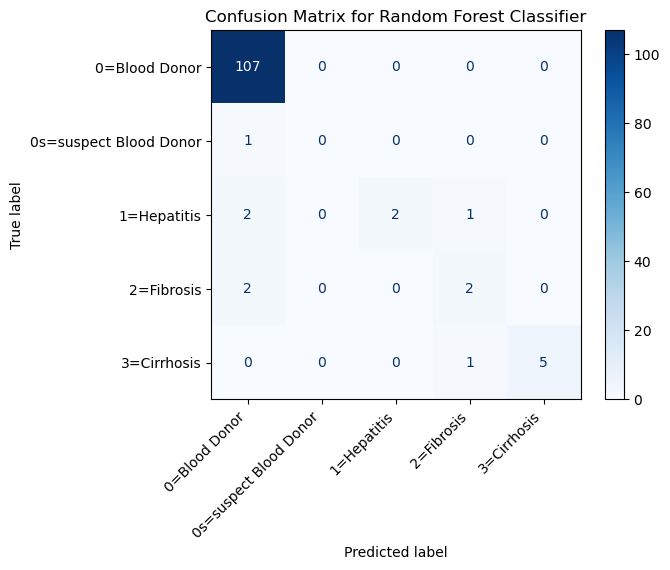

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train a RandomForestClassifier using preprocessed data
model = RandomForestClassifier(random_state=42)

# Fit the model on preprocessed training data
model.fit(X_train_prep, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_prep)

# Evaluate the model using classification report (which includes F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate F2 score (for each class and overall)
f2_score_macro = fbeta_score(y_test, y_pred, beta=2, average='macro')  # Macro-average across all classes
f2_score_weighted = fbeta_score(y_test, y_pred, beta=2, average='weighted')  # Weighted-average based on class support
f2_score_micro = fbeta_score(y_test,y_pred,beta=2,average = 'micro' ) # Micro-average

print(f"F2 Score (Macro Average): {f2_score_macro}")
print(f"F2 Score (Weighted Average): {f2_score_weighted}")
print(f"F2 Score (Micro Average): {f2_score_micro}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

# Display the plot
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xticks(rotation=45, ha='right')
plt.show()


### XGBoost

#### Missing Columns

In [51]:
print(df.columns)


Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


In [52]:
import pandas as pd

# Check for missing values in the dataset
print(df.isnull())


     Category    Age    Sex    ALB    ALP    ALT    AST    BIL    CHE   CHOL  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
..        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
610     False  False  False  False  False  False  False  False  False  False   
611     False  False  False  False  False  False  False  False  False  False   
612     False  False  False  False  False  False  False  False  False  False   
613     False  False  False  False   True  False  False  False  False  False   
614     False  False  False  False   True  False  False  False  False  False   

      CREA    GGT   PROT  
0    False  

In [53]:
# Count missing values in each column
missing_values_count = df.isnull().sum()
print(missing_values_count)


Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


In [54]:
# Check unique values for each column
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in Category: ['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']
Unique values in Age: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 76 77 74 19 23 25 27 29 30
 75]
Unique values in Sex: ['m' 'f']
Unique values in ALB: [38.5 46.9 43.2 39.2 41.6 46.3 42.2 50.9 42.4 44.3 46.4 36.3 39.  38.7
 41.8 40.9 45.2 36.6 42.  46.7 42.7 43.4 40.5 44.8 42.6 29.  44.6 46.8
 46.1 43.6 37.5 42.1 44.7 41.5 48.7 47.3 44.5 47.4 51.  27.8 45.5 41.7
 45.9 53.  47.8 48.9 31.4 42.9 44.  47.9 38.6 51.2 41.9 50.4 33.9 40.8
 48.1 39.9 41.2 48.4 38.3 45.1 38.8 47.  43.9 36.  45.7 45.8 41.4 45.
 39.1 45.4 42.3 40.2 53.3 37.4 45.3 44.1 37.8 38.1 46.2 37.  39.7 54.4
 48.6 39.4 42.8 44.4 38.4 35.5 46.5 36.2 40.3 35.7 37.9 47.7 49.1 43.
 49.7 37.3 51.8 49.5 48.  48.3 36.7 55.4 42.5 38.2 43.1 46.  40.  46.6
 43.5 43.8 38.  36.8 47.2 50.8 82.2 39.3 37.2 40.7 41.  49.  49.2 47.6
 28.1 59.7 43.3 41.3 39.

In [55]:
# Check for 'NA' or '?' in the dataset
print((df == 'NA').sum())  # Count occurrences of 'NA'
print((df == '?').sum())   # Count occurrences of '?'


Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64
Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [56]:
import pandas as pd
import numpy as np

# Replace 'NA' with np.nan in the entire DataFrame
df.replace('NA', np.nan, inplace=True)


In [57]:
print(df.isnull().sum())  # Check the number of missing values in each column


Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


In [58]:
print("X_train_prep shape:", X_train_prep.shape)
print("y_train shape:", y_train.shape)


X_train_prep shape: (369, 13)
y_train shape: (369,)


In [59]:
print(X.shape)
print(y.shape)


(615, 13)
(615,)


#### XGBoost

Classification Report:
                        precision    recall  f1-score   support

         0=Blood Donor       0.98      1.00      0.99       107
0s=suspect Blood Donor       0.00      0.00      0.00         1
           1=Hepatitis       1.00      0.40      0.57         5
            2=Fibrosis       0.57      1.00      0.73         4
           3=Cirrhosis       1.00      0.83      0.91         6

              accuracy                           0.96       123
             macro avg       0.71      0.65      0.64       123
          weighted avg       0.96      0.96      0.95       123

F2 Score (Macro Average): 0.6364910485336306
F2 Score (Weighted Average): 0.9554869243358558
F2 Score (Micro Average): 0.959349593495935


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

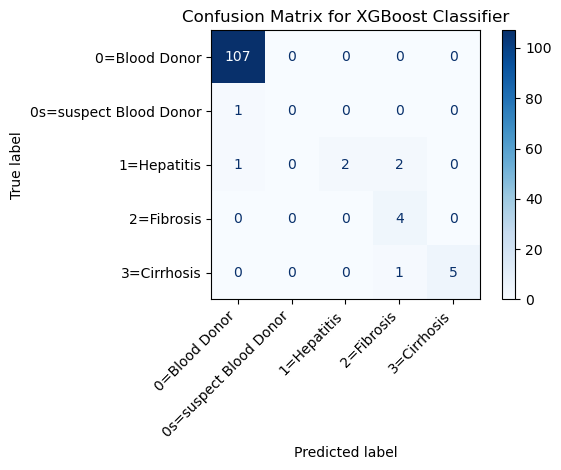

In [60]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder on the target variable and transform it
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
# Train XGBoost model using preprocessed data
model = XGBClassifier(
    objective='multi:softmax',
    num_class=5,  # Number of classes in your target variable
    random_state=42
)

# Fit the model on preprocessed training data with encoded labels
model.fit(X_train_prep, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = model.predict(X_test_prep)

# Convert predictions back to original labels
y_pred = le.inverse_transform(y_pred_encoded)
# Evaluate the model using classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate F2 scores
f2_score_macro = fbeta_score(y_test, y_pred, beta=2, average='macro')
f2_score_weighted = fbeta_score(y_test, y_pred, beta=2, average='weighted')
f2_score_micro = fbeta_score(y_test, y_pred, beta=2, average='micro')

print(f"F2 Score (Macro Average): {f2_score_macro}")
print(f"F2 Score (Weighted Average): {f2_score_weighted}")
print(f"F2 Score (Micro Average): {f2_score_micro}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Reduced Features Model Logistic Regression

Subset 1 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       533
           1       1.00      0.29      0.44         7
           2       0.50      0.25      0.33        24
           3       0.50      0.29      0.36        21
           4       0.86      0.80      0.83        30

    accuracy                           0.93       615
   macro avg       0.76      0.52      0.59       615
weighted avg       0.91      0.93      0.91       615

Subset 1 F2 Score (Macro): 0.544062252932472
Subset 1 F2 Score (Weighted): 0.9192940552926471


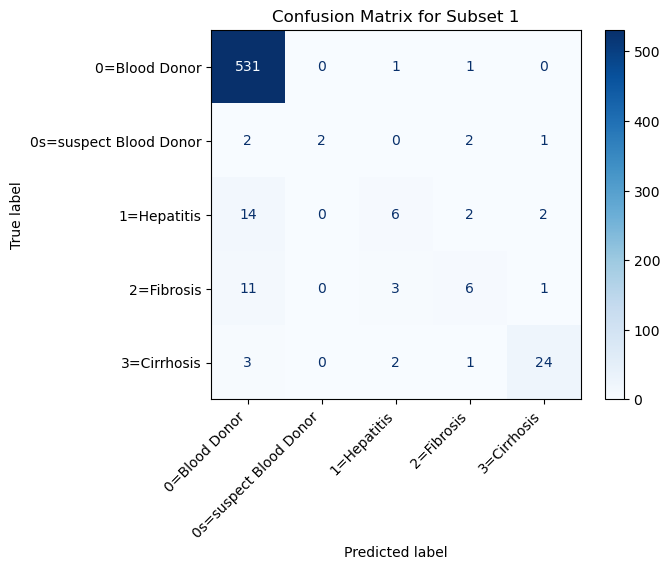

Subset 2 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       533
           1       0.75      0.86      0.80         7
           2       0.00      0.00      0.00        23
           3       0.50      0.10      0.16        21
           4       0.78      0.25      0.38        28

    accuracy                           0.89       612
   macro avg       0.58      0.44      0.46       612
weighted avg       0.84      0.89      0.85       612

Subset 2 F2 Score (Macro): 0.4418834456810619
Subset 2 F2 Score (Weighted): 0.8742317827771067


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

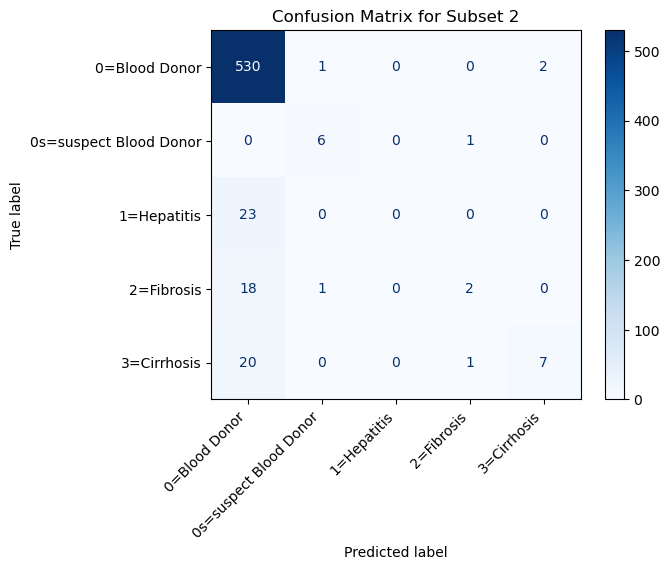

Subset 3 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       526
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        21
           3       0.01      0.50      0.03        12
           4       0.12      0.83      0.21        24

    accuracy                           0.04       590
   macro avg       0.03      0.27      0.05       590
weighted avg       0.01      0.04      0.01       590

Subset 2 F2 Score (Macro): 0.08878448087961056
Subset 2 F2 Score (Weighted): 0.01676238389044438


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precisio

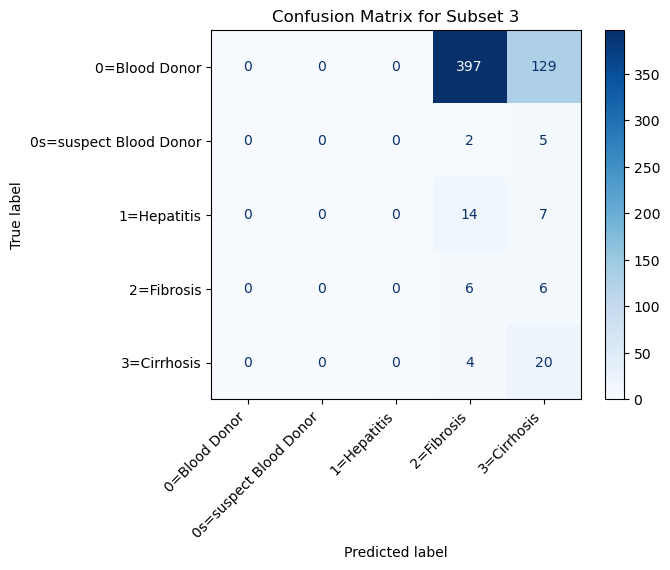

In [65]:
# Example subsets of features without missing values
subset_1 = ['Age','AST', 'BIL', 'CHE', 'CREA', 'GGT']  # Example subset 1
subset_2 = ['ALB', 'ALT', 'PROT']  # Example subset 2
subset_3 = ['ALP', 'CHOL'] # Example subset 3

# Filter rows with no missing values for each subset
df_subset_1 = df[subset_1 + ['Category']].dropna()
df_subset_2 = df[subset_2 + ['Category']].dropna()
df_subset_3 = df[subset_3 + ['Category']].dropna()

# Prepare features (X) and target (y) for each subset
X1 = df_subset_1.drop(columns=['Category'])
y1 = df_subset_1['Category']

X2 = df_subset_2.drop(columns=['Category'])
y2 = df_subset_2['Category']

X3 = df_subset_3.drop(columns=['Category'])
y3 = df_subset_3['Category']

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target variable
label_encoder_1 = LabelEncoder()
y1_encoded = label_encoder_1.fit_transform(y1)

label_encoder_2 = LabelEncoder()
y2_encoded = label_encoder_2.fit_transform(y2)

label_encoder_3 = LabelEncoder()
y3_encoded = label_encoder_3.fit_transform(y3)


# Scale features
scaler_1 = StandardScaler()
X1_scaled = scaler_1.fit_transform(X1)

scaler_2 = StandardScaler()
X2_scaled = scaler_2.fit_transform(X2)

scaler_3 = StandardScaler()
X3_scaled = scaler_3.fit_transform(X3)

from sklearn.linear_model import LogisticRegression

# Train models on each subset
model_1 = LogisticRegression(random_state=42, max_iter=1000)
model_1.fit(X1_scaled, y1_encoded)

model_2 = LogisticRegression(random_state=42, max_iter=1000)
model_2.fit(X2_scaled, y2_encoded)

model_3 = LogisticRegression(random_state=42, max_iter=1000)
model_3.fit(X3, y3_encoded)

from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate Model 1
y_pred_1 = model_1.predict(X1_scaled)
print("Subset 1 Classification Report:")
print(classification_report(y1_encoded, y_pred_1))

f2_macro_1 = fbeta_score(y1_encoded, y_pred_1, beta=2, average='macro')
f2_weighted_1 = fbeta_score(y1_encoded, y_pred_1, beta=2, average='weighted')
print(f"Subset 1 F2 Score (Macro): {f2_macro_1}")
print(f"Subset 1 F2 Score (Weighted): {f2_weighted_1}")

cm_1 = confusion_matrix(y1_encoded, y_pred_1)
disp_cm_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=label_encoder_1.classes_)
disp_cm_1.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 1')
plt.xticks(rotation=45, ha='right')
plt.show()

# Evaluate Model 2
y_pred_2 = model_2.predict(X2_scaled)
print("Subset 2 Classification Report:")
print(classification_report(y2_encoded, y_pred_2))

f2_macro_2 = fbeta_score(y2_encoded, y_pred_2, beta=2, average='macro')
f2_weighted_2 = fbeta_score(y2_encoded, y_pred_2, beta=2, average='weighted')
print(f"Subset 2 F2 Score (Macro): {f2_macro_2}")
print(f"Subset 2 F2 Score (Weighted): {f2_weighted_2}")

cm_2 = confusion_matrix(y2_encoded, y_pred_2)
disp_cm_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=label_encoder_2.classes_)
disp_cm_2.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 2')
plt.xticks(rotation=45, ha='right')
plt.show()

# Evaluate Model 3
y_pred_3 = model_3.predict(X3_scaled)
print("Subset 3 Classification Report:")
print(classification_report(y3_encoded, y_pred_3))

f2_macro_3 = fbeta_score(y3_encoded, y_pred_3, beta=2, average='macro')
f2_weighted_3 = fbeta_score(y3_encoded, y_pred_3, beta=2, average='weighted')
print(f"Subset 2 F2 Score (Macro): {f2_macro_3}")
print(f"Subset 2 F2 Score (Weighted): {f2_weighted_3}")

cm_3 = confusion_matrix(y3_encoded, y_pred_3)
disp_cm_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=label_encoder_3.classes_)
disp_cm_3.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 3')
plt.xticks(rotation=45, ha='right')
plt.show()

### Reduced Features Model with Support Vector Classifier

Subset 1 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       533
           1       1.00      0.57      0.73         7
           2       0.88      0.29      0.44        24
           3       0.75      0.43      0.55        21
           4       0.96      0.87      0.91        30

    accuracy                           0.94       615
   macro avg       0.91      0.63      0.72       615
weighted avg       0.94      0.94      0.93       615

Subset 1 F2 Score (Macro): 0.6606287373429172
Subset 1 F2 Score (Weighted): 0.9360936197122081


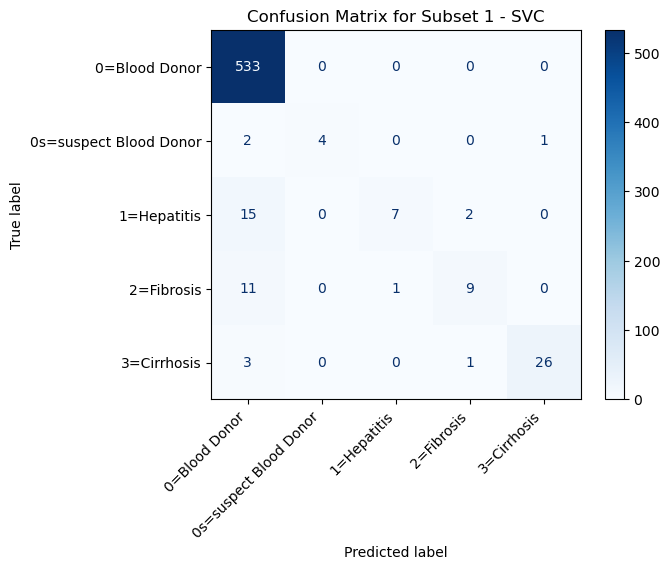

Subset 2 Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       533
           1       1.00      1.00      1.00         7
           2       0.00      0.00      0.00        23
           3       0.86      0.29      0.43        21
           4       1.00      0.43      0.60        28

    accuracy                           0.91       612
   macro avg       0.75      0.54      0.60       612
weighted avg       0.88      0.91      0.88       612

Subset 2 F2 Score (Macro): 0.5588083330659703
Subset 2 F2 Score (Weighted): 0.8988205230717723


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

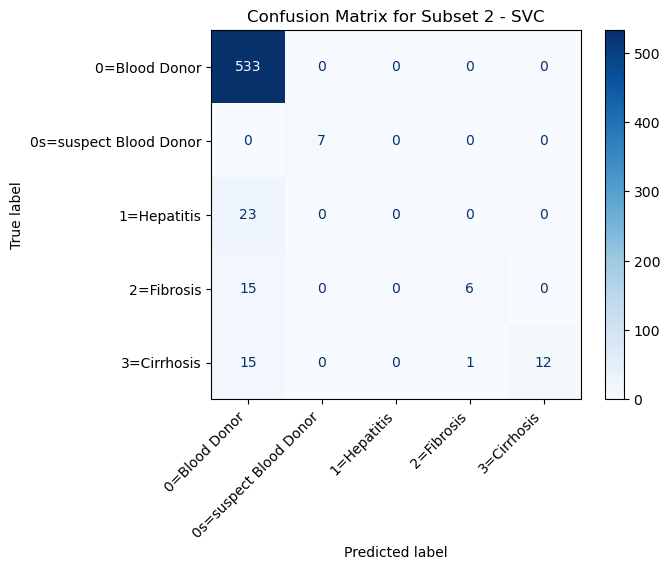

Subset 3 Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       526
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        12
           4       0.67      0.25      0.36        24

    accuracy                           0.90       590
   macro avg       0.31      0.25      0.26       590
weighted avg       0.84      0.90      0.86       590

Subset 3 F2 Score (Macro): 0.25311901213540555
Subset 3 F2 Score (Weighted): 0.8852108991314327


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

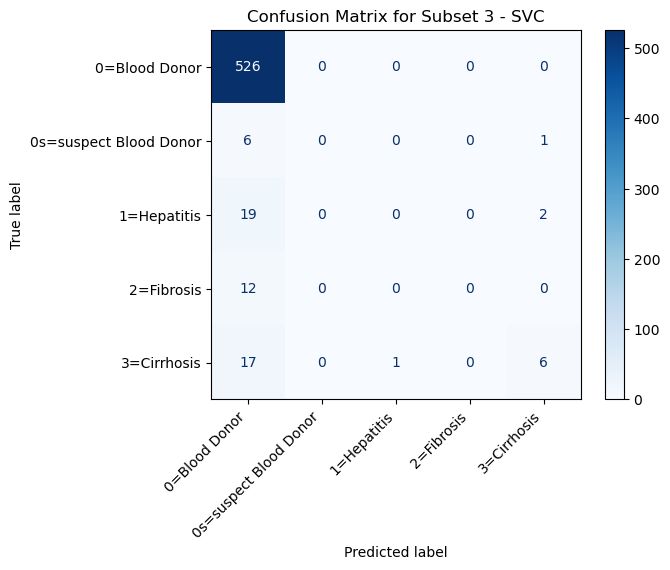

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Example subsets of features without missing values
subset_1 = ['Age', 'AST', 'BIL', 'CHE', 'CREA', 'GGT']  # Example subset 1
subset_2 = ['ALB', 'ALT', 'PROT']  # Example subset 2
subset_3 = ['ALP', 'CHOL']  # Example subset 3

# Filter rows with no missing values for each subset
df_subset_1 = df[subset_1 + ['Category']].dropna()
df_subset_2 = df[subset_2 + ['Category']].dropna()
df_subset_3 = df[subset_3 + ['Category']].dropna()

# Prepare features (X) and target (y) for each subset
X1 = df_subset_1.drop(columns=['Category'])
y1 = df_subset_1['Category']

X2 = df_subset_2.drop(columns=['Category'])
y2 = df_subset_2['Category']

X3 = df_subset_3.drop(columns=['Category'])
y3 = df_subset_3['Category']

# Encode target variable for each subset
label_encoder_1 = LabelEncoder()
y1_encoded = label_encoder_1.fit_transform(y1)

label_encoder_2 = LabelEncoder()
y2_encoded = label_encoder_2.fit_transform(y2)

label_encoder_3 = LabelEncoder()
y3_encoded = label_encoder_3.fit_transform(y3)

# Scale features for each subset
scaler_1 = StandardScaler()
X1_scaled = scaler_1.fit_transform(X1)

scaler_2 = StandardScaler()
X2_scaled = scaler_2.fit_transform(X2)

scaler_3 = StandardScaler()
X3_scaled = scaler_3.fit_transform(X3)

# Train SVC models on each subset
model_1 = SVC(random_state=42)
model_1.fit(X1_scaled, y1_encoded)

model_2 = SVC(random_state=42)
model_2.fit(X2_scaled, y2_encoded)

model_3 = SVC(random_state=42)
model_3.fit(X3_scaled, y3_encoded)

# Evaluate Model 1
y_pred_1 = model_1.predict(X1_scaled)
print("Subset 1 Classification Report:")
print(classification_report(y1_encoded, y_pred_1))

f2_macro_1 = fbeta_score(y1_encoded, y_pred_1, beta=2, average='macro')
f2_weighted_1 = fbeta_score(y1_encoded, y_pred_1, beta=2, average='weighted')
print(f"Subset 1 F2 Score (Macro): {f2_macro_1}")
print(f"Subset 1 F2 Score (Weighted): {f2_weighted_1}")

cm_1 = confusion_matrix(y1_encoded, y_pred_1)
disp_cm_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=label_encoder_1.classes_)
disp_cm_1.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 1 - SVC')
plt.xticks(rotation=45, ha='right')
plt.show()

# Evaluate Model 2
y_pred_2 = model_2.predict(X2_scaled)
print("Subset 2 Classification Report:")
print(classification_report(y2_encoded, y_pred_2))

f2_macro_2 = fbeta_score(y2_encoded, y_pred_2, beta=2, average='macro')
f2_weighted_2 = fbeta_score(y2_encoded, y_pred_2, beta=2, average='weighted')
print(f"Subset 2 F2 Score (Macro): {f2_macro_2}")
print(f"Subset 2 F2 Score (Weighted): {f2_weighted_2}")

cm_2 = confusion_matrix(y2_encoded, y_pred_2)
disp_cm_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=label_encoder_2.classes_)
disp_cm_2.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 2 - SVC')
plt.xticks(rotation=45, ha='right')
plt.show()

# Evaluate Model 3
y_pred_3 = model_3.predict(X3_scaled)
print("Subset 3 Classification Report:")
print(classification_report(y3_encoded, y_pred_3))

f2_macro_3 = fbeta_score(y3_encoded, y_pred_3, beta=2, average='macro')
f2_weighted_3 = fbeta_score(y3_encoded, y_pred_3, beta=2, average='weighted')
print(f"Subset 3 F2 Score (Macro): {f2_macro_3}")
print(f"Subset 3 F2 Score (Weighted): {f2_weighted_3}")

cm_3 = confusion_matrix(y3_encoded, y_pred_3)
disp_cm_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=label_encoder_3.classes_)
disp_cm_3.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 3 - SVC')
plt.xticks(rotation=45, ha='right')
plt.show()



## Step 6: Hyperparameter Tuning

### Reduced Features Model with Support Vector Classifier

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, ke

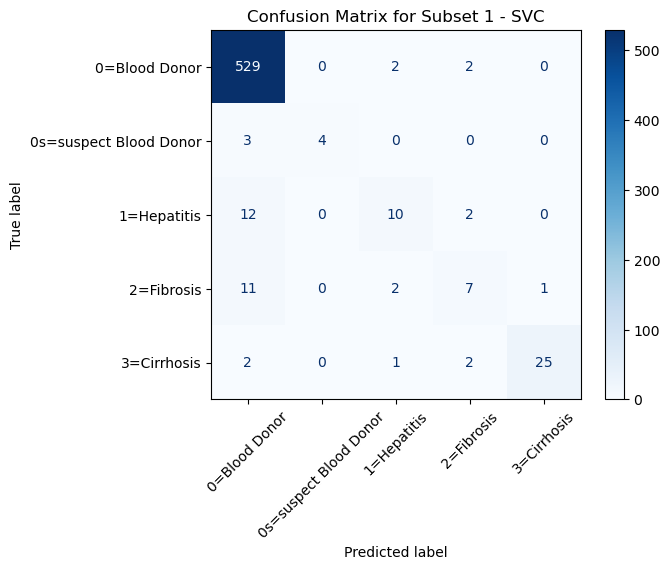

Best Parameters for Subset 2: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Subset 2 Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       533
           1       0.86      0.86      0.86         7
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        28

    accuracy                           0.88       612
   macro avg       0.35      0.37      0.36       612
weighted avg       0.78      0.88      0.82       612

Subset 2 F2 Score (Weighted): 0.8562175083161994


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

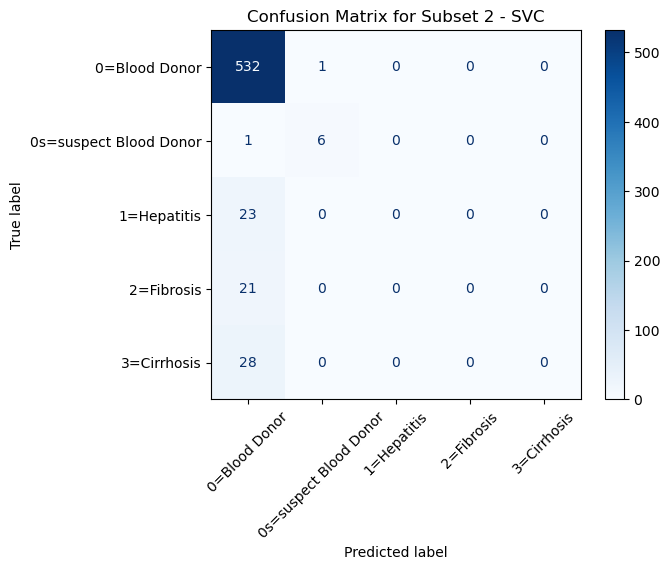

Best Parameters for Subset 3: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Subset 3 Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       526
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        12
           4       1.00      0.04      0.08        24

    accuracy                           0.89       590
   macro avg       0.38      0.21      0.20       590
weighted avg       0.84      0.89      0.84       590

Subset 3 F2 Score (Weighted): 0.8727658942466989


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

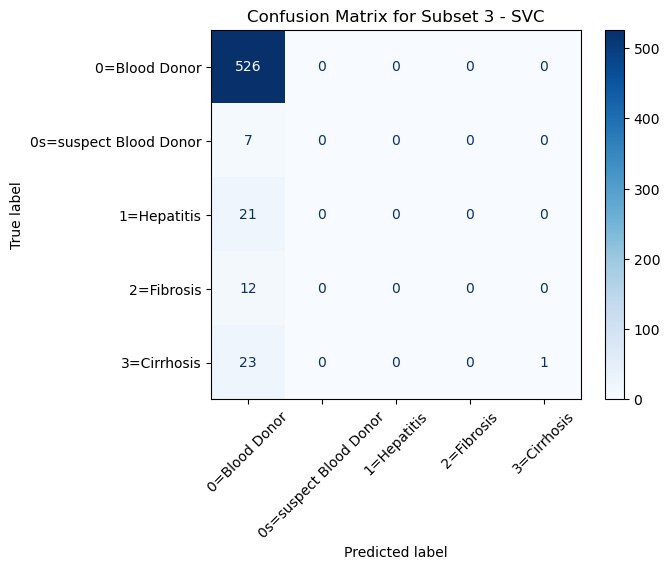

In [67]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, fbeta_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Define custom F2 weighted score function
def f2_weighted_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='weighted')

# Create a scorer using make_scorer
f2_weighted_scorer = make_scorer(f2_weighted_score)

# Example subsets of features without missing values
subset_1 = ['Age', 'AST', 'BIL', 'CHE', 'CREA', 'GGT']  # Example subset 1
subset_2 = ['ALB', 'ALT', 'PROT']  # Example subset 2
subset_3 = ['ALP', 'CHOL']  # Example subset 3

# Filter rows with no missing values for each subset
df_subset_1 = df[subset_1 + ['Category']].dropna()
df_subset_2 = df[subset_2 + ['Category']].dropna()
df_subset_3 = df[subset_3 + ['Category']].dropna()

# Prepare features (X) and target (y) for each subset
X1 = df_subset_1.drop(columns=['Category'])
y1 = df_subset_1['Category']

X2 = df_subset_2.drop(columns=['Category'])
y2 = df_subset_2['Category']

X3 = df_subset_3.drop(columns=['Category'])
y3 = df_subset_3['Category']

# Encode target variable for each subset
label_encoder_1 = LabelEncoder()
y1_encoded = label_encoder_1.fit_transform(y1)

label_encoder_2 = LabelEncoder()
y2_encoded = label_encoder_2.fit_transform(y2)

label_encoder_3 = LabelEncoder()
y3_encoded = label_encoder_3.fit_transform(y3)

# Scale features for each subset
scaler_1 = StandardScaler()
X1_scaled = scaler_1.fit_transform(X1)

scaler_2 = StandardScaler()
X2_scaled = scaler_2.fit_transform(X2)

scaler_3 = StandardScaler()
X3_scaled = scaler_3.fit_transform(X3)

# Define parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}

# Set up GridSearchCV for each subset with F2 weighted scorer
grid_search_1 = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring=f2_weighted_scorer, verbose=2)
grid_search_2 = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring=f2_weighted_scorer, verbose=2)
grid_search_3 = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring=f2_weighted_scorer, verbose=2)

# Fit GridSearchCV on each subset
grid_search_1.fit(X1_scaled, y1_encoded)
grid_search_2.fit(X2_scaled, y2_encoded)
grid_search_3.fit(X3_scaled, y3_encoded)

# Function to calculate and print mean and std of F2 weighted scores
def print_mean_std_f2_weighted(grid_search, X_scaled, y_encoded, subset_name):
    best_model = grid_search.best_estimator_
    f2_scores = cross_val_score(best_model, X_scaled, y_encoded, cv=5, scoring=f2_weighted_scorer)
    print(f"{subset_name} F2 Weighted Score - Mean: {np.mean(f2_scores):.4f} ± Std: {np.std(f2_scores):.4f}")

# Calculate and print mean and std of F2 weighted scores for each subset
print_mean_std_f2_weighted(grid_search_1, X1_scaled, y1_encoded, "Subset 1")
print_mean_std_f2_weighted(grid_search_2, X2_scaled, y2_encoded, "Subset 2")
print_mean_std_f2_weighted(grid_search_3, X3_scaled, y3_encoded, "Subset 3")

# Best parameters and evaluation for Subset 1
print("\nBest Parameters for Subset 1:", grid_search_1.best_params_)
best_model_1 = grid_search_1.best_estimator_
y_pred_best_1 = best_model_1.predict(X1_scaled)
print("Subset 1 Classification Report:")
print(classification_report(y1_encoded, y_pred_best_1))

# Calculate F2 weighted score for Subset 1
f2_weighted_best_subset_1 = f2_weighted_score(y1_encoded, y_pred_best_1)
print(f"Subset 1 F2 Weighted Score: {f2_weighted_best_subset_1:.4f}")

# Generate and display confusion matrix for Subset 1
cm_best_svc_1 = confusion_matrix(y1_encoded, y_pred_best_1)
disp_cm_best_svc_1 = ConfusionMatrixDisplay(confusion_matrix=cm_best_svc_1, display_labels=label_encoder_1.classes_)
disp_cm_best_svc_1.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 1 - SVC')
plt.xticks(rotation=45)
plt.show()

# Best parameters and evaluation for Subset 2
print("Best Parameters for Subset 2:", grid_search_2.best_params_)
best_model_2 = grid_search_2.best_estimator_
y_pred_best_2 = best_model_2.predict(X2_scaled)
print("Subset 2 Classification Report:")
print(classification_report(y2_encoded, y_pred_best_2))

# Calculate F2 score for Subset 2
f2_weighted_best_subset_2 = fbeta_score(y2_encoded, y_pred_best_2, beta=2, average='weighted')
print(f"Subset 2 F2 Score (Weighted): {f2_weighted_best_subset_2}")

# Generate and display confusion matrix for Subset 2
cm_best_knn_2 = confusion_matrix(y2_encoded, y_pred_best_2)
disp_cm_best_knn_2 = ConfusionMatrixDisplay(confusion_matrix=cm_best_knn_2, display_labels=label_encoder_2.classes_)
disp_cm_best_knn_2.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 2 - SVC')
plt.xticks(rotation=45)
plt.show()

# Best parameters and evaluation for Subset 3
print("Best Parameters for Subset 3:", grid_search_3.best_params_)
best_model_3 = grid_search_3.best_estimator_
y_pred_best_3 = best_model_3.predict(X3_scaled)
print("Subset 3 Classification Report:")
print(classification_report(y3_encoded, y_pred_best_3))

# Calculate F2 score for Subset 3
f2_weighted_best_subset_3 = fbeta_score(y3_encoded, y_pred_best_3, beta=2, average='weighted')
print(f"Subset 3 F2 Score (Weighted): {f2_weighted_best_subset_3}")

# Generate and display confusion matrix for Subset 3
cm_best_knn_3 = confusion_matrix(y3_encoded, y_pred_best_3)
disp_cm_best_knn_3 = ConfusionMatrixDisplay(confusion_matrix=cm_best_knn_3, display_labels=label_encoder_3.classes_)
disp_cm_best_knn_3.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 3 - SVC')
plt.xticks(rotation=45)
plt.show()



In [68]:
# Example: Compare SVC subsets

svc_f2weighted_scores = {
    'Subset 1': f2_weighted_best_subset_1,
    'Subset 2': f2_weighted_best_subset_2,
    'Subset 3': f2_weighted_best_subset_3
}
best_svcweighted_subset = max(svc_f2weighted_scores, key=svc_f2weighted_scores.get)
print(f"Best SVC Weighted Subset: {best_svcweighted_subset} with F2 Score: {svc_f2weighted_scores[best_svcweighted_subset]}")


Best SVC Weighted Subset: Subset 1 with F2 Score: 0.9312627709175425


In [69]:
def calculate_mean_std_f2_weighted(grid_search, X_scaled, y_encoded):
    best_model = grid_search.best_estimator_
    f2_weighted_scores = cross_val_score(best_model, X_scaled, y_encoded, cv=5, 
                                         scoring=make_scorer(fbeta_score, beta=2, average='weighted'))
    
    return np.mean(f2_weighted_scores), np.std(f2_weighted_scores)

# Calculate mean and std for each subset
subset_scores = {}
for i, (grid_search, X_scaled, y_encoded) in enumerate([(grid_search_1, X1_scaled, y1_encoded), 
                                                        (grid_search_2, X2_scaled, y2_encoded), 
                                                        (grid_search_3, X3_scaled, y3_encoded)], 1):
    weighted_mean, weighted_std = calculate_mean_std_f2_weighted(grid_search, X_scaled, y_encoded)
    subset_name = f"Subset {i}"
    subset_scores[subset_name] = (weighted_mean, weighted_std)
    print(f"{subset_name}:")
    print(f"  F2 Weighted - Mean: {weighted_mean:.4f} ± Std: {weighted_std:.4f}")

# Find the best subset
best_subset = max(subset_scores, key=lambda k: subset_scores[k][0])
svc_f2weighted_mean, svc_f2weighted_std = subset_scores[best_subset]

print(f"\nBest Weighted Subset: {best_subset} with F2 Score: {svc_f2weighted_mean:.4f} ± {svc_f2weighted_std:.4f}")


Subset 1:
  F2 Weighted - Mean: 0.9011 ± Std: 0.0261
Subset 2:
  F2 Weighted - Mean: 0.8637 ± Std: 0.0077
Subset 3:
  F2 Weighted - Mean: 0.8716 ± Std: 0.0042

Best Weighted Subset: Subset 1 with F2 Score: 0.9011 ± 0.0261


### Reduced Features Model with Logistic Regression

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.001; total time=   0.

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   9.5s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   9.8s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=  11.3s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=  11.3s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   0.3s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   3.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   0.1s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   0.1s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, to

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=  13.2s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   4.9s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=  10.1s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=  13.1s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   0.1s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   7.5s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   9.8s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   0.4s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   0.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=  10.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.1s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.5s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   0.3s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   2.3s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.1s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   6.6s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   9.7s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   9.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=  11.7s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   8.8s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   8.2s
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   8.2s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalt

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   8.4s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   8.4s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, to

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   7.6s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   7.5s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   7.7s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   7.6s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   7.7s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   8.4s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   8.6s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   9.7s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   7.8s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   7.7s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   7.8s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   7.9s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   8.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   9.6s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   0.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   9.9s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   9.7s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   7.8s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   7.9s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   9.8s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=  10.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.3s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   8.1s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, 

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.8s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   7.8s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   0.1s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   0.2s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   0.4s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   0.5s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   0.2s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   3.4s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.1s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.1s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.3s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.2s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   8.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   5.6s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   7.8s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   6.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   6.7s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   6.6s
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   6.5s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   6.7s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   6.8s
[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   1.1s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, so

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   7.8s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   7.9s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   8.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   6.8s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   0.5s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   7.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   7.0s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   7.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   7.6s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   7.9s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   8.2s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   7.8s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   8.5s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   7.7s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   0.5s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   1.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   6.8s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   6.9s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   6.9s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   7.8s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.5s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   0.2s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   7.8s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   8.3s
[CV] END C=1, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   0.1s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   6.8s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   6.4s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   7.4s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.0001; total time=   6.3s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   5.9s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l2, solver=saga, tol=0.001; total time=   5.6s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.0001; total time=   5.8s
[CV] END C=100.0, class_weight=balanced, max_iter=100000, penalty=l1, solver=saga, tol=0.001; total time=   0.1s
Subset 1 F2 Weighted Score - Mean: 0.8998 ± Std: 0.0231
Subset 2 F2 Weighted Score - Mean: 0.8622 ± Std: 0.0212
Subset 3 F2 Weighted Score - Mean: 0.8735 ± Std: 0.0114

Best Parameters for Subset 1: {'C': 1, 'class_weight': 'balanced', 'max_iter': 100000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
Subset 1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       533
           1       0.45      0.71      0.56         7
           2       0.46      0.46      0.46        24
           3       0.56      0.48      0.51        21
           4       0.83      0.80      0.81   

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


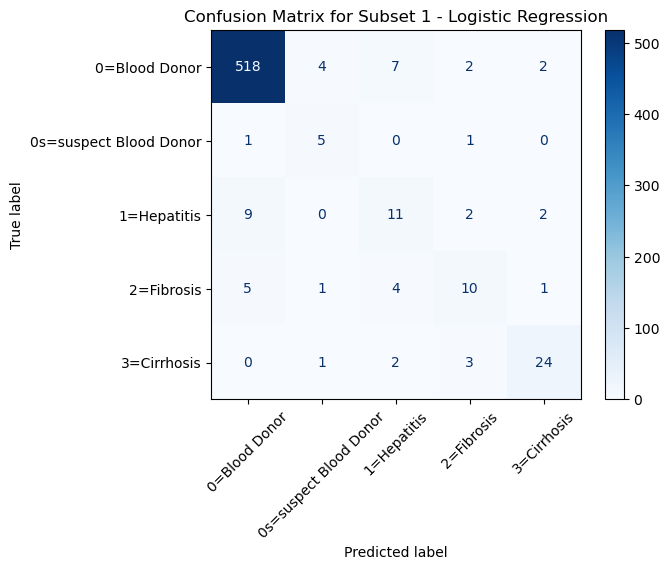

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

Best Parameters for Subset 2: {'C': 1, 'class_weight': 'balanced', 'max_iter': 100000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
Subset 2 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       533
           1       0.56      0.71      0.62         7
           2       0.00      0.00      0.00        23
           3       0.58      0.33      0.42        21
           4       0.44      0.57      0.50        28

    accuracy                           0.88       612
   macro avg       0.50      0.52      0.50       612
weighted avg       0.85      0.88      0.86       612

Subset 2 F2 Score (Weighted): 0.8747207175445877


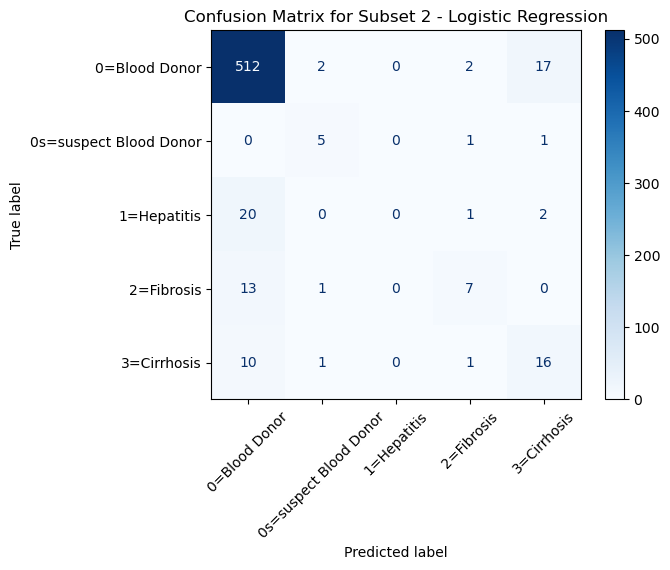

Best Parameters for Subset 3: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
Subset 3 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       526
           1       0.29      0.29      0.29         7
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        12
           4       0.38      0.25      0.30        24

    accuracy                           0.89       590
   macro avg       0.32      0.30      0.31       590
weighted avg       0.84      0.89      0.87       590

Subset 3 F2 Score (Weighted): 0.8817429600960898


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

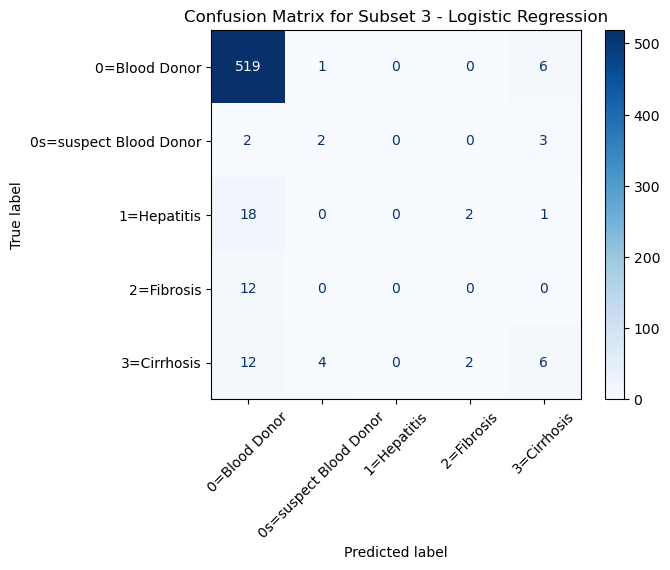

In [70]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, fbeta_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Define custom F2 weighted score function
def f2_weighted_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='weighted')

# Create a scorer using make_scorer
f2_weighted_scorer = make_scorer(f2_weighted_score)

# Example subsets of features without missing values
subset_1 = ['Age', 'AST', 'BIL', 'CHE', 'CREA', 'GGT']  # Example subset 1
subset_2 = ['ALB', 'ALT', 'PROT']  # Example subset 2
subset_3 = ['ALP', 'CHOL']  # Example subset 3

# Filter rows with no missing values for each subset
df_subset_1 = df[subset_1 + ['Category']].dropna()
df_subset_2 = df[subset_2 + ['Category']].dropna()
df_subset_3 = df[subset_3 + ['Category']].dropna()

# Prepare features (X) and target (y) for each subset
X1 = df_subset_1.drop(columns=['Category'])
y1 = df_subset_1['Category']

X2 = df_subset_2.drop(columns=['Category'])
y2 = df_subset_2['Category']

X3 = df_subset_3.drop(columns=['Category'])
y3 = df_subset_3['Category']

# Encode target variable for each subset
label_encoder_1 = LabelEncoder()
y1_encoded = label_encoder_1.fit_transform(y1)

label_encoder_2 = LabelEncoder()
y2_encoded = label_encoder_2.fit_transform(y2)

label_encoder_3 = LabelEncoder()
y3_encoded = label_encoder_3.fit_transform(y3)

# Scale features for each subset
scaler_1 = StandardScaler()
X1_scaled = scaler_1.fit_transform(X1)

scaler_2 = StandardScaler()
X2_scaled = scaler_2.fit_transform(X2)

scaler_3 = StandardScaler()
X3_scaled = scaler_3.fit_transform(X3)

param_grid_lr = {
    'C': [1e-2, 1, 1e2],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100000],
    'class_weight': ['balanced'],
    'penalty': ['l1', 'l2'],
    'tol': [1e-4, 1e-3]
}

# Set up GridSearchCV for each subset with F2 weighted scorer
grid_search_lr_1 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_weighted_scorer, verbose=2, n_jobs=-1)
grid_search_lr_2 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_weighted_scorer, verbose=2, n_jobs=-1)
grid_search_lr_3 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_weighted_scorer, verbose=2, n_jobs=-1)

# Fit GridSearchCV on each subset
grid_search_lr_1.fit(X1_scaled, y1_encoded)
grid_search_lr_2.fit(X2_scaled, y2_encoded)
grid_search_lr_3.fit(X3_scaled, y3_encoded)

# Function to calculate and print mean and std of F2 weighted scores
def print_mean_std_f2_weighted(grid_search, X_scaled, y_encoded, subset_name):
    best_model = grid_search.best_estimator_
    f2_scores = cross_val_score(best_model, X_scaled, y_encoded, cv=5, scoring=f2_weighted_scorer)
    print(f"{subset_name} F2 Weighted Score - Mean: {np.mean(f2_scores):.4f} ± Std: {np.std(f2_scores):.4f}")

# Calculate and print mean and std of F2 weighted scores for each subset
print_mean_std_f2_weighted(grid_search_lr_1, X1_scaled, y1_encoded, "Subset 1")
print_mean_std_f2_weighted(grid_search_lr_2, X2_scaled, y2_encoded, "Subset 2")
print_mean_std_f2_weighted(grid_search_lr_3, X3_scaled, y3_encoded, "Subset 3")

# Best parameters and evaluation for Subset 1
print("\nBest Parameters for Subset 1:", grid_search_lr_1.best_params_)
best_model_lr_1 = grid_search_lr_1.best_estimator_
y_pred_best_lr_1 = best_model_lr_1.predict(X1_scaled)
print("Subset 1 Classification Report:")
print(classification_report(y1_encoded, y_pred_best_lr_1))

# Calculate F2 weighted score for Subset 1
f2_weighted_best_subset_1 = f2_weighted_score(y1_encoded, y_pred_best_lr_1)
print(f"Subset 1 F2 Weighted Score: {f2_weighted_best_subset_1:.4f}")

# Generate and display confusion matrix for Subset 1
cm_best_lr_1 = confusion_matrix(y1_encoded, y_pred_best_lr_1)
disp_cm_best_lr_1 = ConfusionMatrixDisplay(confusion_matrix=cm_best_lr_1, display_labels=label_encoder_1.classes_)
disp_cm_best_lr_1.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 1 - Logistic Regression')
plt.xticks(rotation=45)
plt.show()

# Best parameters and evaluation for Subset 2
print("Best Parameters for Subset 2:", grid_search_lr_2.best_params_)
best_model_lr_2 = grid_search_lr_2.best_estimator_
y_pred_best_lr_2 = best_model_lr_2.predict(X2_scaled)
print("Subset 2 Classification Report:")
print(classification_report(y2_encoded, y_pred_best_lr_2))

# Calculate F2 score for Subset 2
f2_weighted_best_subset_2 = fbeta_score(y2_encoded, y_pred_best_lr_2, beta=2, average='weighted')
print(f"Subset 2 F2 Score (Weighted): {f2_weighted_best_subset_2}")

# Generate and display confusion matrix for Subset 2
cm_best_lr_2 = confusion_matrix(y2_encoded, y_pred_best_lr_2)
disp_cm_best_lr_2 = ConfusionMatrixDisplay(confusion_matrix=cm_best_lr_2, display_labels=label_encoder_2.classes_)
disp_cm_best_lr_2.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 2 - Logistic Regression')
plt.xticks(rotation=45)
plt.show()

# Best parameters and evaluation for Subset 3
print("Best Parameters for Subset 3:", grid_search_lr_3.best_params_)
best_model_lr_3 = grid_search_lr_3.best_estimator_
y_pred_best_lr_3 = best_model_lr_3.predict(X3_scaled)
print("Subset 3 Classification Report:")
print(classification_report(y3_encoded, y_pred_best_lr_3))

# Calculate F2 score for Subset 3
f2_weighted_best_subset_3 = fbeta_score(y3_encoded, y_pred_best_lr_3, beta=2, average='weighted')
print(f"Subset 3 F2 Score (Weighted): {f2_weighted_best_subset_3}")

# Generate and display confusion matrix for Subset 3
cm_best_lr_3 = confusion_matrix(y3_encoded, y_pred_best_lr_3)
disp_cm_best_lr_3 = ConfusionMatrixDisplay(confusion_matrix=cm_best_lr_3, display_labels=label_encoder_3.classes_)
disp_cm_best_lr_3.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 3 - Logistic Regression')
plt.xticks(rotation=45)
plt.show()


In [71]:
def calculate_mean_std_f2_weighted_lr(grid_search, X_scaled, y_encoded):
    best_model = grid_search.best_estimator_
    f2_weighted_scores = cross_val_score(best_model, X_scaled, y_encoded, cv=5, 
                                         scoring=make_scorer(fbeta_score, beta=2, average='weighted'))
    return np.mean(f2_weighted_scores), np.std(f2_weighted_scores)

# Calculate mean and std for each subset
subset_scores_lr = {}
for i, (grid_search, X_scaled, y_encoded) in enumerate([(grid_search_lr_1, X1_scaled, y1_encoded), 
                                                        (grid_search_lr_2, X2_scaled, y2_encoded), 
                                                        (grid_search_lr_3, X3_scaled, y3_encoded)], 1):
    weighted_mean, weighted_std = calculate_mean_std_f2_weighted_lr(grid_search, X_scaled, y_encoded)
    subset_name = f"Subset {i}"
    subset_scores_lr[subset_name] = (weighted_mean, weighted_std)
    print(f"{subset_name}:")
    print(f"  F2 Weighted - Mean: {weighted_mean:.4f} ± Std: {weighted_std:.4f}")

# Find the best subset
best_subset_lr = max(subset_scores_lr, key=lambda k: subset_scores_lr[k][0])
lr_f2weighted_mean, lr_f2weighted_std = subset_scores_lr[best_subset_lr]

print(f"\nBest Weighted Subset: {best_subset_lr} with F2 Score: {lr_f2weighted_mean:.4f} ± {lr_f2weighted_std:.4f}")


Subset 1:
  F2 Weighted - Mean: 0.8998 ± Std: 0.0231
Subset 2:
  F2 Weighted - Mean: 0.8622 ± Std: 0.0212
Subset 3:
  F2 Weighted - Mean: 0.8735 ± Std: 0.0114

Best Weighted Subset: Subset 1 with F2 Score: 0.8998 ± 0.0231


In [72]:
# Example: Compare LR subsets
lr_f2weighted_scores = {
    'Subset 1': f2_weighted_best_subset_1,
    'Subset 2': f2_weighted_best_subset_2,
    'Subset 3': f2_weighted_best_subset_3
}
best_lrweighted_subset = max(lr_f2weighted_scores, key=lr_f2weighted_scores.get)
print(f"Best Logistic Regression Weighted Subset: {best_lrweighted_subset} with F2 Score: {lr_f2weighted_scores[best_lrweighted_subset]}")


Best Logistic Regression Weighted Subset: Subset 1 with F2 Score: 0.9234835300158399


### XGBoost

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END c

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


F2 Weighted Score - Mean: 0.9442 ± Std: 0.0209
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Classification Report:
                        precision    recall  f1-score   support

         0=Blood Donor       0.98      1.00      0.99       107
0s=suspect Blood Donor       0.00      0.00      0.00         1
           1=Hepatitis       1.00      0.20      0.33         5
            2=Fibrosis       0.57      1.00      0.73         4
           3=Cirrhosis       0.83      0.83      0.83         6

              accuracy                           0.95       123
             macro avg       0.68      0.61      0.58       123
          weighted avg       0.95      0.95      0.94       123

F2 Score (Weighted Average): 0.9453


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

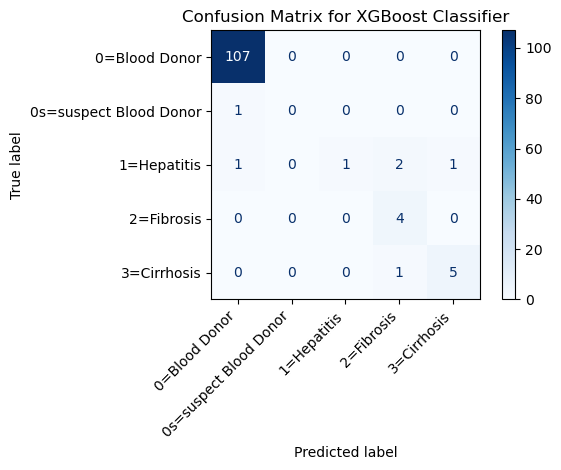

In [73]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, fbeta_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Define custom F2 weighted score function
def f2_weighted_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='weighted')

# Create a scorer using make_scorer
f2_weighted_scorer = make_scorer(f2_weighted_score)

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define parameter grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV for XGBoost with F2 weighted scorer and reduced n_splits
grid_search_xgb = GridSearchCV(
    XGBClassifier(objective='multi:softmax', num_class=5, random_state=42), 
    param_grid_xgb, 
    cv=3,  # Reduce n_splits to 3 to handle small class size
    scoring=f2_weighted_scorer,
    verbose=2
)

# Fit GridSearchCV on training data
grid_search_xgb.fit(X_train_prep, y_train_encoded)

# Calculate mean and std of F2 weighted scores
f2_scores = cross_val_score(grid_search_xgb.best_estimator_, X_train_prep, y_train_encoded, cv=5, scoring=f2_weighted_scorer)
f2_xgb_weighted_mean = np.mean(f2_scores)
f2_xgb_weighted_std = np.std(f2_scores)
print(f"F2 Weighted Score - Mean: {f2_xgb_weighted_mean:.4f} ± Std: {f2_xgb_weighted_std:.4f}")

# Best parameters and evaluation
print("Best Parameters:", grid_search_xgb.best_params_)
best_model_xgb = grid_search_xgb.best_estimator_

# Set feature names for the booster
best_model_xgb.get_booster().feature_names = df_test.columns.tolist()

y_pred_best_encoded = best_model_xgb.predict(X_test_prep)
y_pred_best = le.inverse_transform(y_pred_best_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

# Calculate F2 weighted score
f2_xgb_weighted = f2_weighted_score(y_test, y_pred_best)
print(f"F2 Score (Weighted Average): {f2_xgb_weighted:.4f}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Random Forest Classifier

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, 

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


F2 Weighted Score - Mean: 0.9288 ± Std: 0.0220
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
                        precision    recall  f1-score   support

         0=Blood Donor       0.96      1.00      0.98       107
0s=suspect Blood Donor       0.00      0.00      0.00         1
           1=Hepatitis       1.00      0.40      0.57         5
            2=Fibrosis       0.50      0.50      0.50         4
           3=Cirrhosis       1.00      0.83      0.91         6

              accuracy                           0.94       123
             macro avg       0.69      0.55      0.59       123
          weighted avg       0.94      0.94      0.93       123

F2 Score (Weighted Average): 0.9387


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

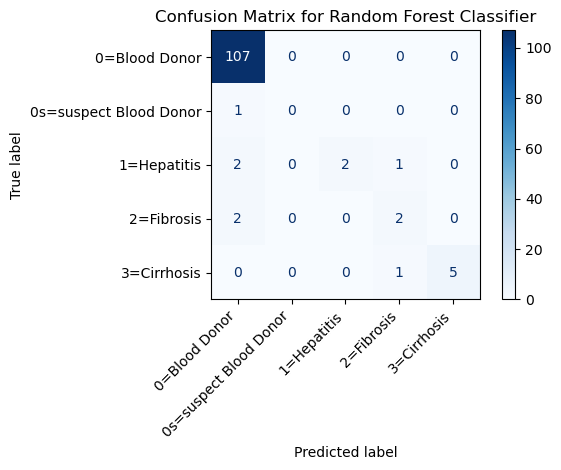

In [74]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define custom F2 weighted score function
def f2_weighted_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='weighted')

# Create a scorer using make_scorer
f2_weighted_scorer = make_scorer(f2_weighted_score)

# Define a refined parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV for Random Forest with F2 weighted scorer
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring=f2_weighted_scorer, verbose=2)

# Fit GridSearchCV on training data
grid_search_rf.fit(X_train_prep, y_train)

# Calculate mean and std of F2 weighted scores
f2_scores = cross_val_score(grid_search_rf.best_estimator_, X_train_prep, y_train, cv=5, scoring=f2_weighted_scorer)
f2_rf_weighted_mean = np.mean(f2_scores)
f2_rf_weighted_std = np.std(f2_scores)
print(f"F2 Weighted Score - Mean: {np.mean(f2_scores):.4f} ± Std: {np.std(f2_scores):.4f}")

# Best parameters and evaluation
print("Best Parameters:", grid_search_rf.best_params_)
best_model_rf = grid_search_rf.best_estimator_
y_pred_best = best_model_rf.predict(X_test_prep)
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

# Calculate F2 weighted score
f2_rf_weighted = f2_weighted_score(y_test, y_pred_best)
print(f"F2 Score (Weighted Average): {f2_rf_weighted:.4f}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Evaluation Metric Comparison

In [75]:
f2_baseline_macro = 0.19419237749546278
f2_baseline_weighted = 0.8446579021144113
f2_baseline_mean = 0.8446579021144113
f2_baseline_std = 0.000

F2 Weighted Scores:
Baseline: 0.8447 ± 0.0000
SVC: 0.9011 ± 0.0261
Logistic Regression: 0.8998 ± 0.0231
XGBoost: 0.9442 ± 0.0209
Random Forest: 0.9288 ± 0.0220


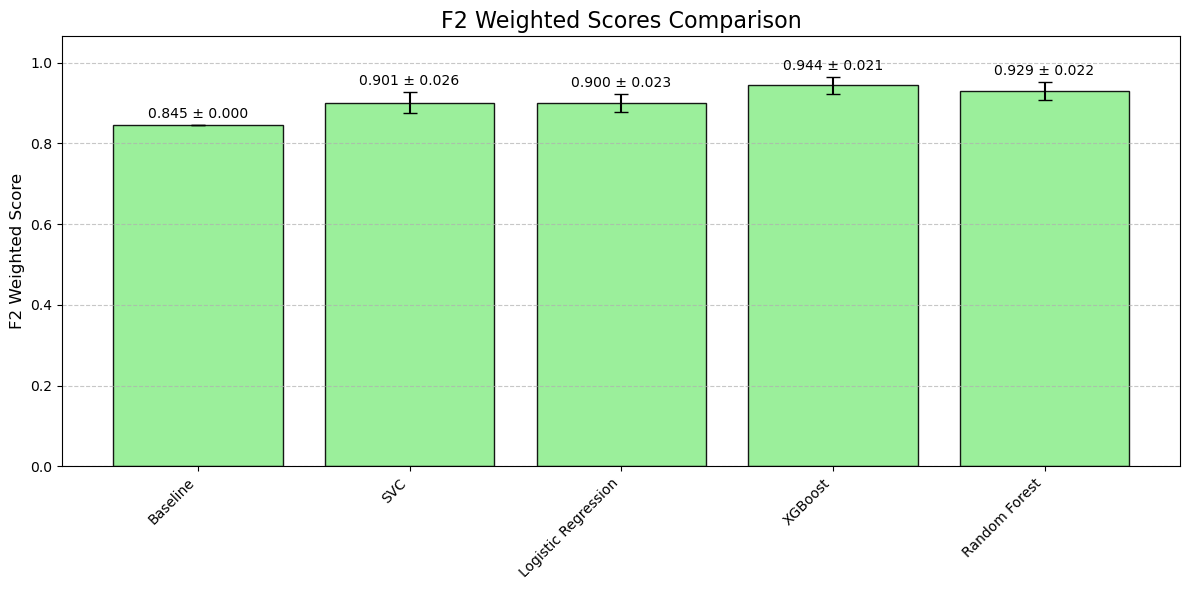

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Models and their F2 weighted scores
models = ['Baseline', 'SVC', 'Logistic Regression', 'XGBoost', 'Random Forest']

# Example: Replace these with your actual calculated means and standard deviations
f2_weighted_means = [f2_baseline_mean, svc_f2weighted_mean, lr_f2weighted_mean, f2_xgb_weighted_mean, f2_rf_weighted_mean]
f2_weighted_stds = [f2_baseline_std, svc_f2weighted_std, lr_f2weighted_std, f2_xgb_weighted_std, f2_rf_weighted_std]

# Print F2 Weighted Scores for each model
print("F2 Weighted Scores:")
for model, mean, std in zip(models, f2_weighted_means, f2_weighted_stds):
    print(f"{model}: {mean:.4f} ± {std:.4f}")

# Create a single plot for F2 Weighted with error bars
fig, ax = plt.subplots(figsize=(12, 6))

# F2 Weighted plot with error bars
bars = ax.bar(models, f2_weighted_means, yerr=f2_weighted_stds, capsize=5,
              color='lightgreen', alpha=0.9, edgecolor='black')
ax.set_title('F2 Weighted Scores Comparison', fontsize=16)
ax.set_ylabel('F2 Weighted Score', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, max(np.array(f2_weighted_means) + np.array(f2_weighted_stds)) + 0.1)  # Adjust y-axis limit

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar, std in zip(bars, f2_weighted_stds):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + std + 0.01,
            f'{height:.3f} ± {std:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


F2 Weighted Scores:
Baseline: 0.8447
SVC: 0.9313
Logistic Regression: 0.9235
XGBoost: 0.9453
Random Forest: 0.9387


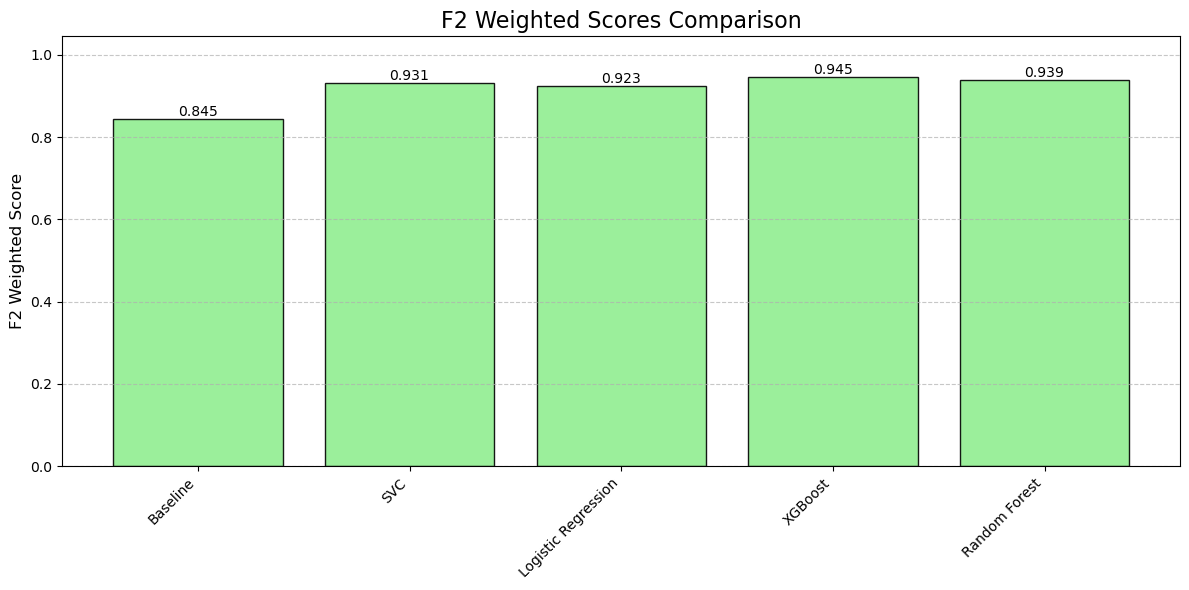

In [77]:
import matplotlib.pyplot as plt

# Models and their F2 weighted scores
models = ['Baseline', 'SVC', 'Logistic Regression', 'XGBoost', 'Random Forest']
f2_weighted_means = [f2_baseline_weighted, svc_f2weighted_scores[best_svcweighted_subset], lr_f2weighted_scores[best_lrweighted_subset], f2_xgb_weighted, f2_rf_weighted]
f2_weighted_stds = [f2_baseline_std,svc_f2weighted_std,  ]

# Print F2 Weighted Scores for each model
print("F2 Weighted Scores:")
for model, score in zip(models, f2_weighted_means):
    print(f"{model}: {score:.4f}")

# Create a single plot for F2 Weighted
fig, ax = plt.subplots(figsize=(12, 6))

# F2 Weighted plot
bars = ax.bar(models, f2_weighted_means, color='lightgreen', alpha=0.9, edgecolor='black')
ax.set_title('F2 Weighted Scores Comparison', fontsize=16)
ax.set_ylabel('F2 Weighted Score', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, max(f2_weighted_means) + 0.1)  # Adjust y-axis limit

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [78]:
import numpy as np

# Define the means and standard deviations
baseline_mean = 0.8447
baseline_std = 0.0000
best_model_mean = 0.9442
best_model_std = 0.0209

# Calculate the difference in means
difference = best_model_mean - baseline_mean

# Use the best model's standard deviation since the baseline's std is 0
num_std_devs = difference / best_model_std

print(f"The XGBoost model is {num_std_devs:.2f} standard deviations above the baseline.")


The XGBoost model is 4.76 standard deviations above the baseline.


## Step 7: Interpret the Model

### Permutation Feature Importance

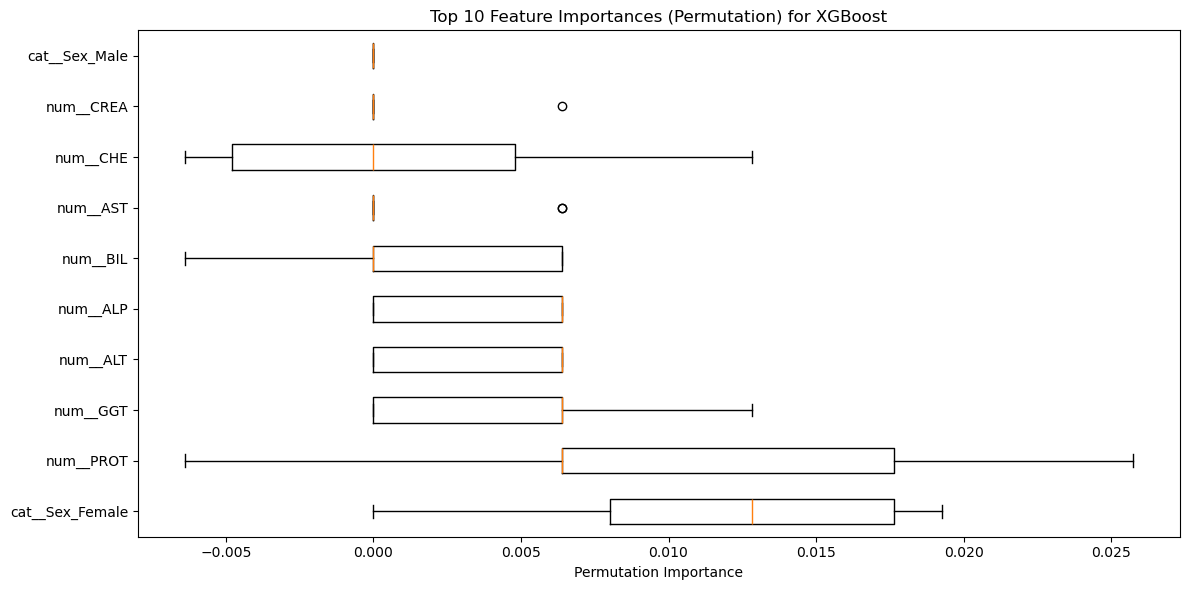

Top 10 Features by Permutation Importance:
cat__Sex_Female: 0.0122 ± 0.0061
num__PROT: 0.0096 ± 0.0092
num__GGT: 0.0045 ± 0.0041
num__ALT: 0.0038 ± 0.0031
num__ALP: 0.0038 ± 0.0031
num__BIL: 0.0019 ± 0.0041
num__AST: 0.0013 ± 0.0026
num__CHE: 0.0011 ± 0.0066
num__CREA: 0.0006 ± 0.0019
cat__Sex_Male: 0.0000 ± 0.0000


In [79]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Ensure best_model_xgb is assigned correctly (from GridSearchCV)
best_model_xgb = grid_search_xgb.best_estimator_

# Calculate permutation importance with custom F2 scorer
result = permutation_importance(
    best_model_xgb,
    df_test,
    y_test_encoded,
    n_repeats=10,
    random_state=42,
    scoring=f2_weighted_scorer  # Use F2 weighted scoring
)

# Get indices of top 10 features based on mean importance
top_10_idx = np.argsort(result.importances_mean)[-10:]

# Sort the top 10 indices in descending order for plotting
sorted_top_10_idx = top_10_idx[np.argsort(result.importances_mean[top_10_idx])[::-1]]

# Prepare data for box plot
importances = result.importances[sorted_top_10_idx].T

# Plot the top 10 feature importances using a box plot
plt.figure(figsize=(12, 6))
plt.boxplot(importances, vert=False, tick_labels=df_test.columns[sorted_top_10_idx])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Feature Importances (Permutation) for XGBoost')
plt.tight_layout()
plt.show()

# Print the top 10 features and their importance scores
print("Top 10 Features by Permutation Importance:")
for i in sorted_top_10_idx:
    print(f"{df_test.columns[i]}: {result.importances_mean[i]:.4f} ± {result.importances_std[i]:.4f}")


### XGBoost Metrics

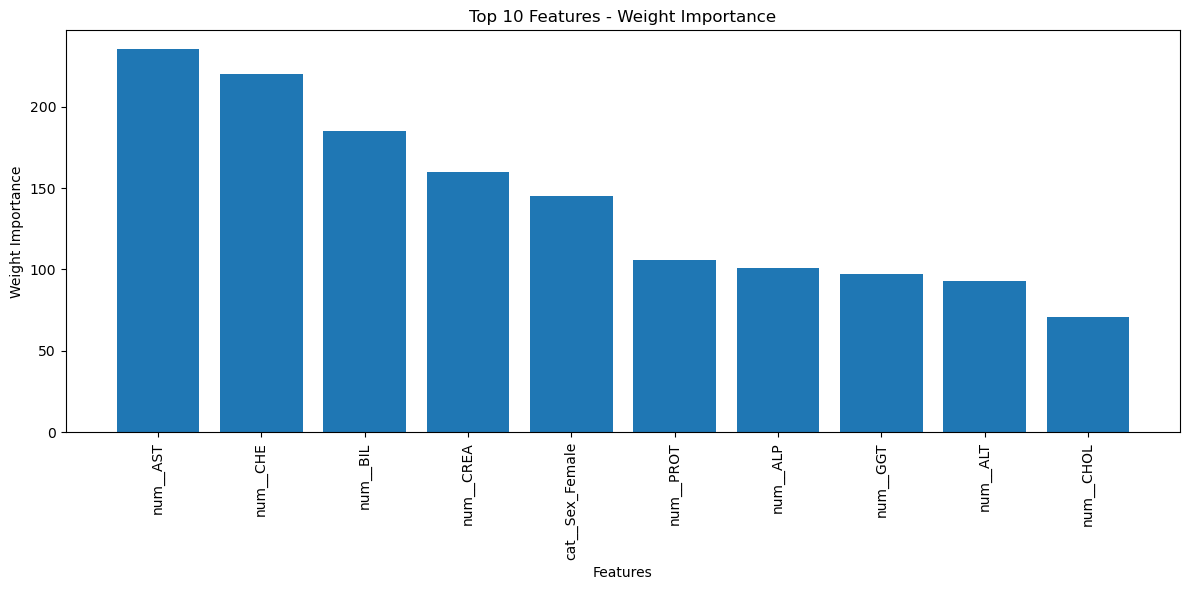


Top 10 features by weight importance:
num__AST: 235.0000
num__CHE: 220.0000
num__BIL: 185.0000
num__CREA: 160.0000
cat__Sex_Female: 145.0000
num__PROT: 106.0000
num__ALP: 101.0000
num__GGT: 97.0000
num__ALT: 93.0000
num__CHOL: 71.0000


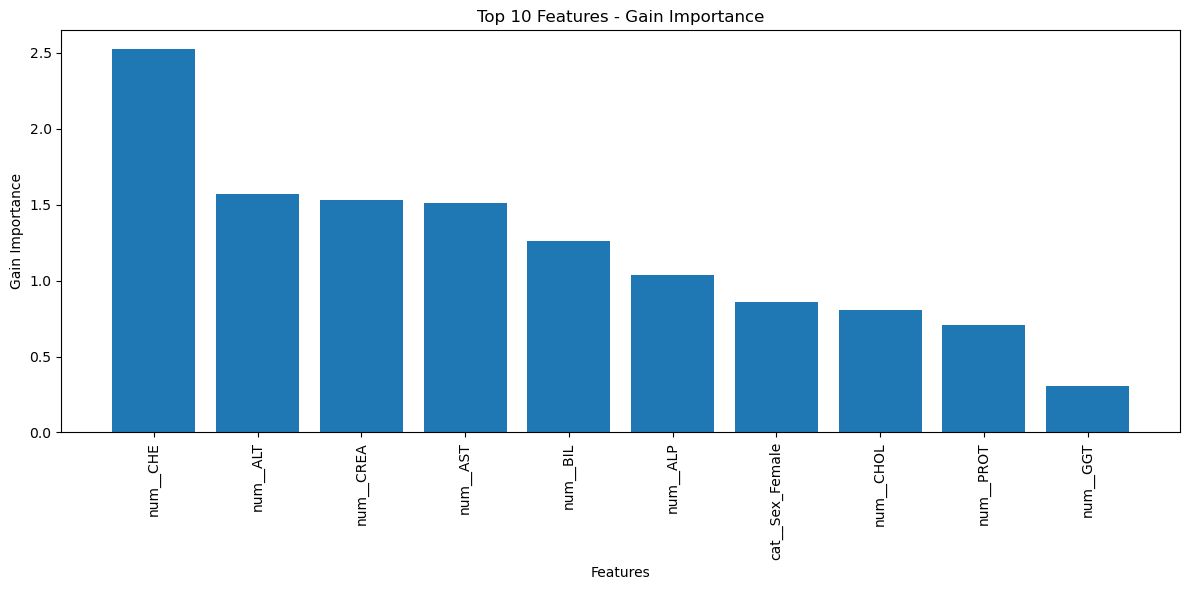


Top 10 features by gain importance:
num__CHE: 2.5212
num__ALT: 1.5674
num__CREA: 1.5280
num__AST: 1.5076
num__BIL: 1.2620
num__ALP: 1.0360
cat__Sex_Female: 0.8614
num__CHOL: 0.8037
num__PROT: 0.7042
num__GGT: 0.3048


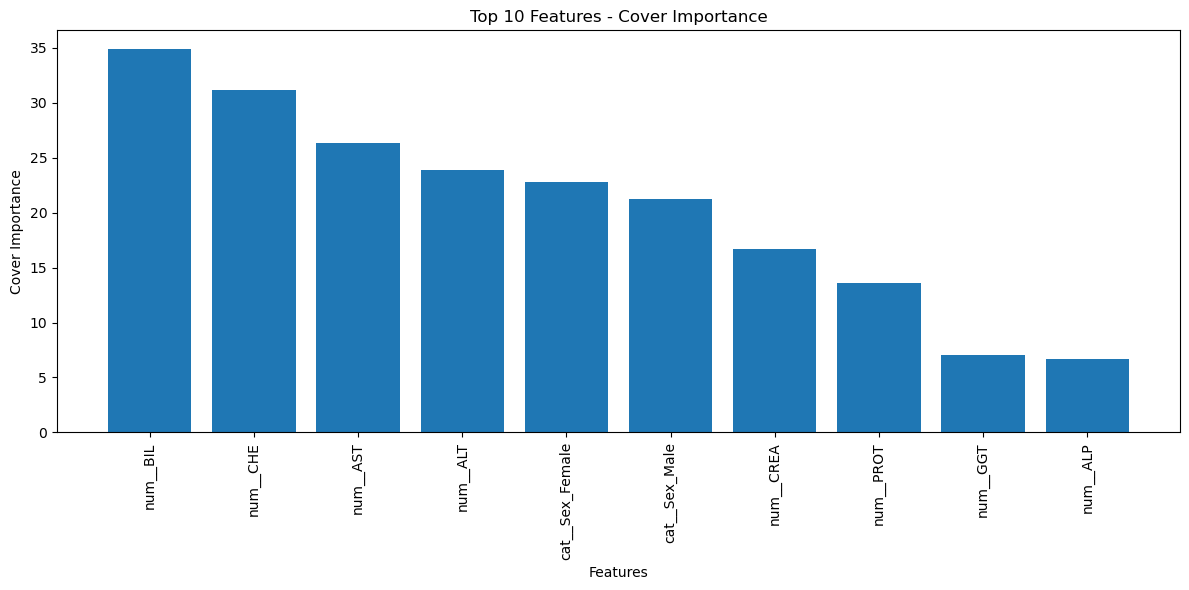


Top 10 features by cover importance:
num__BIL: 34.8297
num__CHE: 31.1425
num__AST: 26.3656
num__ALT: 23.8733
cat__Sex_Female: 22.7932
cat__Sex_Male: 21.2271
num__CREA: 16.6702
num__PROT: 13.5688
num__GGT: 7.0683
num__ALP: 6.6386


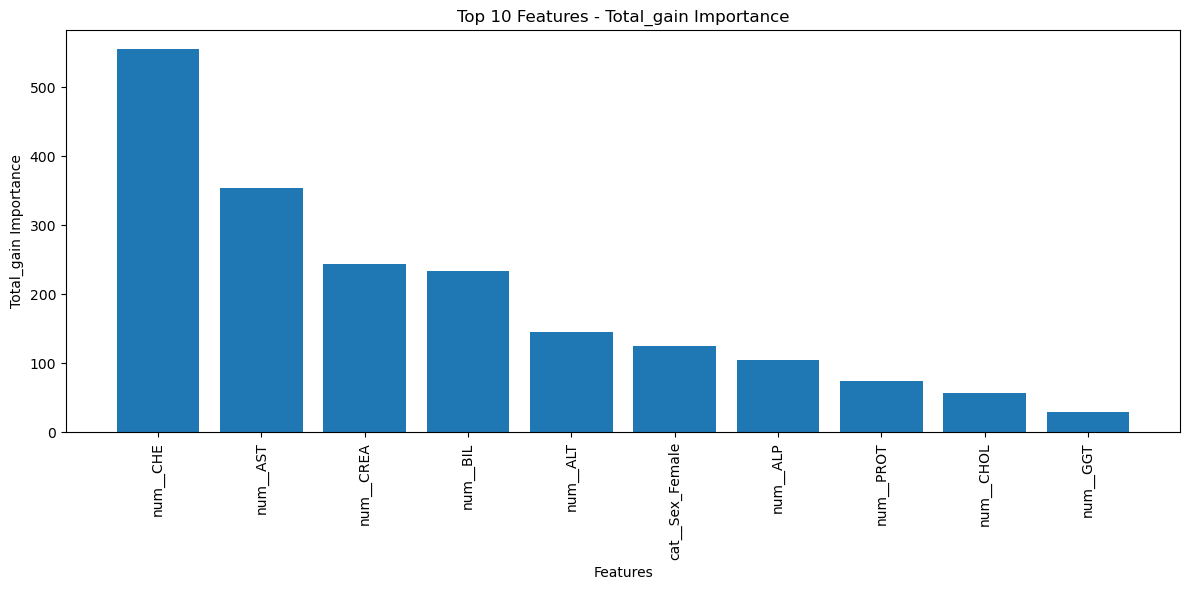


Top 10 features by total_gain importance:
num__CHE: 554.6642
num__AST: 354.2881
num__CREA: 244.4810
num__BIL: 233.4781
num__ALT: 145.7719
cat__Sex_Female: 124.9033
num__ALP: 104.6333
num__PROT: 74.6481
num__CHOL: 57.0635
num__GGT: 29.5676


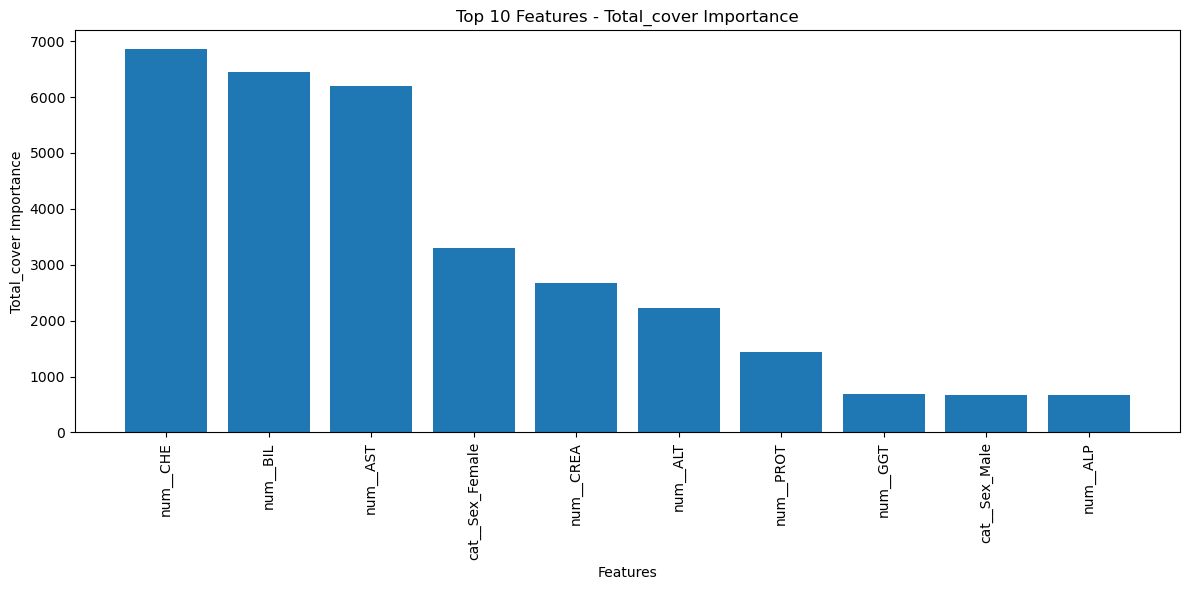


Top 10 features by total_cover importance:
num__CHE: 6851.3438
num__BIL: 6443.4941
num__AST: 6195.9229
cat__Sex_Female: 3305.0083
num__CREA: 2667.2290
num__ALT: 2220.2180
num__PROT: 1438.2935
num__GGT: 685.6216
cat__Sex_Male: 679.2687
num__ALP: 670.4991


In [80]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

best_model_xgb = grid_search_xgb.best_estimator_

# Calculate feature importances
importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
importance_dicts = {}

for imp_type in importance_types:
    importance = best_model_xgb.get_booster().get_score(importance_type=imp_type)
    importance_dicts[imp_type] = importance

# Create figures for each importance type
for imp_type in importance_types:
    importance = importance_dicts[imp_type]
    
    # Sort features by importance
    sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
    top_10_features = dict(sorted_importance[:10])
    
    # Create bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(top_10_features)), list(top_10_features.values()), align='center')
    plt.xticks(range(len(top_10_features)), list(top_10_features.keys()), rotation=90)
    plt.title(f'Top 10 Features - {imp_type.capitalize()} Importance')
    plt.xlabel('Features')
    plt.ylabel(f'{imp_type.capitalize()} Importance')
    plt.tight_layout()
    plt.show()

    # Print top 10 features and their importance scores
    print(f"\nTop 10 features by {imp_type} importance:")
    for feature, score in top_10_features.items():
        print(f"{feature}: {score:.4f}")


### Local Feature Importance SHAP

In [81]:
import pandas as pd
if not isinstance(X_test_prep, pd.DataFrame):
    X_test_prep = pd.DataFrame(X_test_prep, columns=df_test.columns)


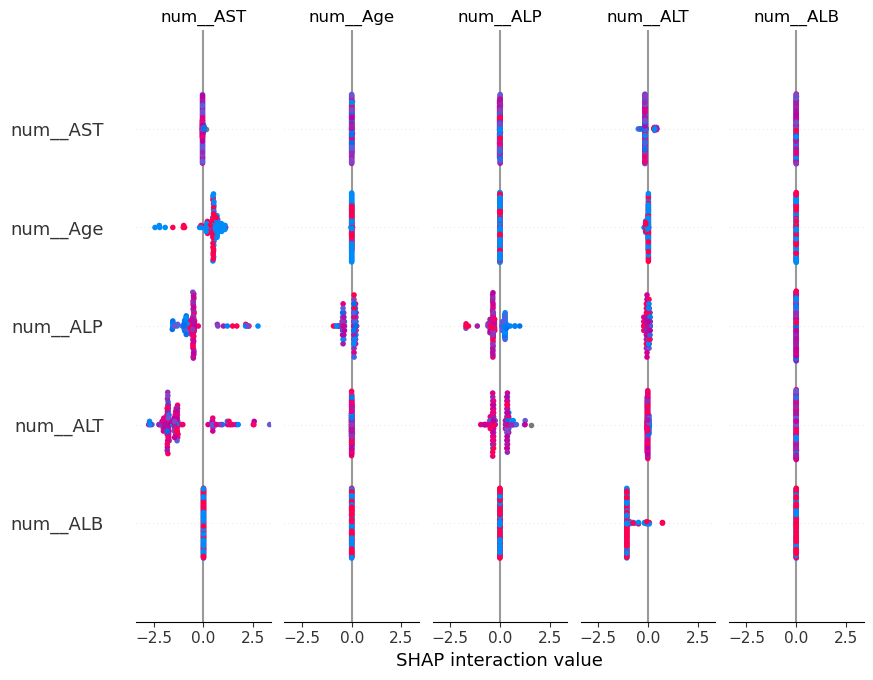

DimensionError: Length of features is not equal to the length of shap_values!

In [82]:
import shap

# Create SHAP explainer for XGBoost
explainer = shap.TreeExplainer(best_model_xgb)
shap_values = explainer.shap_values(X_test_prep)

# For summary plot
shap.summary_plot(shap_values, X_test_prep, plot_type="bar", class_names=best_model_xgb.classes_)

# For force plot (for a specific class, e.g., class 0)
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test_prep.iloc[0,:])

# For dependence plot (for a specific feature and class)
shap.dependence_plot(X_test_prep.columns[0], shap_values[0], X_test_prep)


In [ ]:
shap_values = explainer.shap_values(X_test_prep)
print("New shap_values shape:", [sv.shape for sv in shap_values])


New shap_values shape: [(13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13,

In [ ]:
shap_values = explainer.shap_values(X_test_prep, check_additivity=False)


In [ ]:
print([sv.shape for sv in shap_values])


[(13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), (13, 5), 

In [ ]:
explainer = shap.KernelExplainer(best_model_xgb.predict_proba, X_test_prep)
shap_values = explainer.shap_values(X_test_prep)


AttributeError: property 'feature_names_in_' of 'XGBClassifier' object has no setter

In [ ]:
for class_index in range(len(shap_values)):
    shap.plots.force(
        explainer.expected_value[class_index],
        shap_values[class_index][0],  # First sample of the class
        X_test_prep.iloc[0],
        matplotlib=True
    )
    plt.title(f"Local Feature Importance for Class {class_index}")
    plt.show()


DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
print("X_test_prep columns:", X_test_prep.columns)


X_test_prep columns: Index(['num__Age', 'num__ALB', 'num__ALP', 'num__ALT', 'num__AST', 'num__BIL',
       'num__CHE', 'num__CHOL', 'num__CREA', 'num__GGT', 'num__PROT',
       'cat__Sex_Female', 'cat__Sex_Male'],
      dtype='object')


In [ ]:
print("X_test_prep shape:", X_test_prep.shape)
print("shap_values shape:", shap_values[0].shape)


X_test_prep shape: (123, 13)
shap_values shape: (13, 5)


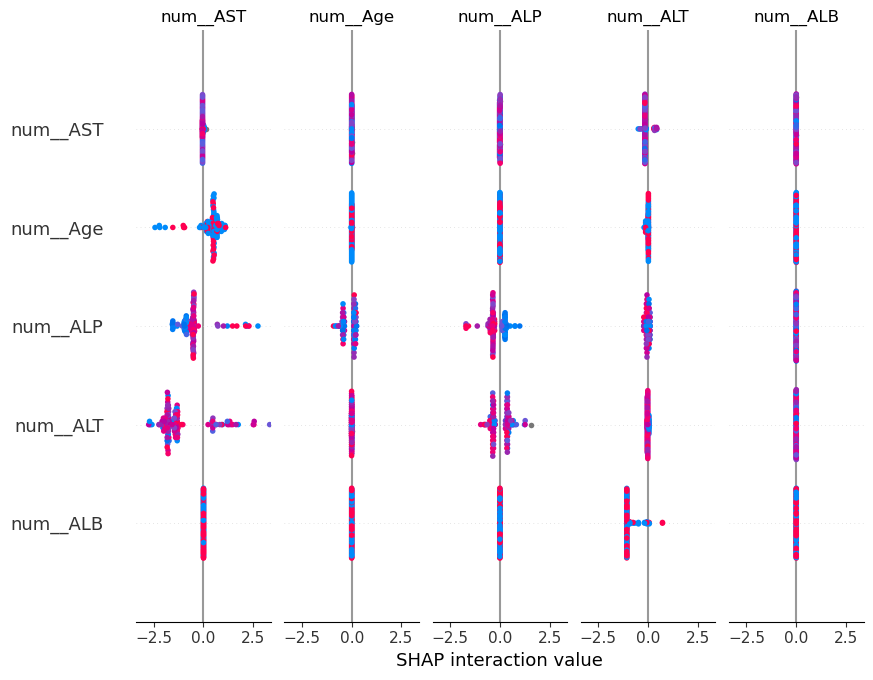

DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
import shap

# Create SHAP explainer for XGBoost
explainer = shap.TreeExplainer(best_model_xgb)
shap_values = explainer.shap_values(X_test_prep)

# For summary plot
shap.summary_plot(shap_values, X_test_prep, plot_type="bar", class_names=best_model_xgb.classes_)

# For force plot (for a specific class, e.g., class 0)
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_prep.iloc[0,:])

# For dependence plot (for a specific feature and class)
shap.dependence_plot("feature_name", shap_values[0], X_test_prep)


In [ ]:
import shap

# Create SHAP explainer for XGBoost
explainer = shap.TreeExplainer(best_model_xgb)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_prep)

# Visualize local feature importance for a specific instance (e.g., the first test sample)
instance_index = 0  # Change this to visualize other instances
shap.plots.force(
    explainer.expected_value[0],  # Use the first class's expected value
    shap_values[0][instance_index],  # SHAP values for the first class
    X_test_prep.iloc[instance_index],
    matplotlib=True
)
plt.title(f"Local Feature Importance for Instance {instance_index} (Class 0)")
plt.show()

# Visualize local feature importance for multiple instances (e.g., first 10 samples)
for i in range(10):  # Adjust the range for more/less instances
    for class_index in range(len(explainer.expected_value)):
        shap.plots.force(
            explainer.expected_value[class_index],
            shap_values[class_index][i],
            X_test_prep.iloc[i],
            matplotlib=True
        )
        plt.title(f"Local Feature Importance for Instance {i} (Class {class_index})")
        plt.show()


DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
import shap

# Assuming 'model' is your trained XGBoost model and 'X_test' is your feature matrix
explainer = shap.TreeExplainer(best_model_xgb)
shap_values = explainer.shap_values(X_test_prep)

# For summary plot
shap.summary_plot(shap_values, X_test_prep, plot_type="bar", class_names=model.classes_)

# For force plot (for a specific class, e.g., class 0)
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_prep.iloc[0,:])

# For dependence plot (for a specific feature and class)
shap.dependence_plot("feature_name", shap_values[0], X_test_prep)


AttributeError: 'str' object has no attribute 'classes_'

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Assuming best_model_xgb is your trained XGBoost model
# and df_test is your test feature matrix

# Create SHAP explainer for XGBoost
explainer = shap.TreeExplainer(best_model_xgb)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(df_test)

# Visualize local feature importance for a specific instance (e.g., the first test sample)
instance_index = 0  # Change this to visualize other instances
shap.plots.force(
    explainer.expected_value[0],  # Use the first class's expected value
    shap_values[0][instance_index],  # SHAP values for the first class
    df_test.iloc[instance_index],
    matplotlib=True
)
plt.title(f"Local Feature Importance for Instance {instance_index} (Class 0)")
plt.show()

# Visualize local feature importance for multiple instances (e.g., first 10 samples)
for i in range(10):  # Adjust the range for more/less instances
    for class_index in range(len(explainer.expected_value)):
        shap.plots.force(
            explainer.expected_value[class_index],
            shap_values[class_index][i],
            df_test.iloc[i],
            matplotlib=True
        )
        plt.title(f"Local Feature Importance for Instance {i} (Class {class_index})")
        plt.show()


DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Assuming best_model_xgb is your trained XGBoost model
# and df_test is your test feature matrix
import shap
import xgboost as xgb

# Assuming 'model' is your trained XGBoost model
explainer = shap.TreeExplainer(model)

# Create SHAP explainer for XGBoost
explainer = shap.TreeExplainer(best_model_xgb)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(df_test)

# Visualize local feature importance for a specific instance (e.g., the first test sample)
instance_index = 0  # Change this to visualize other instances
shap.force_plot(
    explainer.expected_value,
    shap_values[instance_index],
    df_test.iloc[instance_index],
    matplotlib=True
)
plt.title(f"Local Feature Importance for Instance {instance_index}")
plt.show()

# Visualize local feature importance for multiple instances (e.g., first 10 samples)
for i in range(10):  # Adjust the range for more/less instances
    shap.force_plot(
        explainer.expected_value,
        shap_values[i],
        df_test.iloc[i],
        matplotlib=True
    )
    plt.title(f"Local Feature Importance for Instance {i}")
    plt.show()


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [ ]:
import shap

# Create SHAP explainer for XGBoost
explainer = shap.TreeExplainer(best_model_xgb)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_prep)

# Visualize local feature importance for a specific instance (e.g., the first test sample)
instance_index = 0  # Change this to visualize other instances
shap.plots.force(
    explainer.expected_value[0],  # Use the first class's expected value
    shap_values[0][instance_index],  # SHAP values for the first class
    X_test_prep.iloc[instance_index],
    matplotlib=True
)
plt.title(f"Local Feature Importance for Instance {instance_index} (Class 0)")
plt.show()

# Visualize local feature importance for multiple instances (e.g., first 10 samples)
for i in range(10):  # Adjust the range for more/less instances
    for class_index in range(len(explainer.expected_value)):
        shap.plots.force(
            explainer.expected_value[class_index],
            shap_values[class_index][i],
            X_test_prep.iloc[i],
            matplotlib=True
        )
        plt.title(f"Local Feature Importance for Instance {i} (Class {class_index})")
        plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'